# Analyse et Prédiction du Risque de Diabète

* Les installations :

In [73]:
!pip install imbalanced-learn

* Les imports : 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from viz import visualization
from iqr import detecte_outliers_with_iqr
from zscore import detect_outliers_z_score
from knn import knn_imputation, knn_imputation_without_standarisation

from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from zscore import detect_remote_outliers_z_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


* Importer dataset :

In [75]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeF

## 🎯 Prétraitement des données - Gestion des valeurs manquantes et aberrantes

### 1️⃣ Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

*️⃣ utiliser La standarisation Avant knn : 

In [76]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.000000    0.000000                  0.078000   21.000000  
25%      0.000000   27.300000                  0.243750   24.000000  
50%     30.500000   32.000000                  0.372500   29.000000  
75%    127.250000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

In [77]:
dataset_1 = knn_imputation(dataset)
print("******************** Après : is null : ****************************** \n", dataset_1.isnull().sum())
dataset_1.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  121.583594      72.289062      28.975260   
std    221.846794     3.369578   30.497521      12.196650       9.446136   
min      0.000000     0.000000   44.000000      24.000000       7.000000   
25%    191.750000     1.000000   99.000000      64.000000      22.400000   
50%    383.500000     3.000000  117.000000      72.000000      29.000000   
75%    575.250000     6.000000  140.250000      80.000000      35.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean   154.781510   32.404375                  0.471876   33.240885  
std     97.969796    6.896876                  0.331329   11.760232  
min     14.000000   18.200000                  0.078000   21.000000  
25%     88.950000   27.400000                  0.243750   24.000000  
50%    134.100000   32.050000                  0.372500   29.000000  
75%    191.050000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


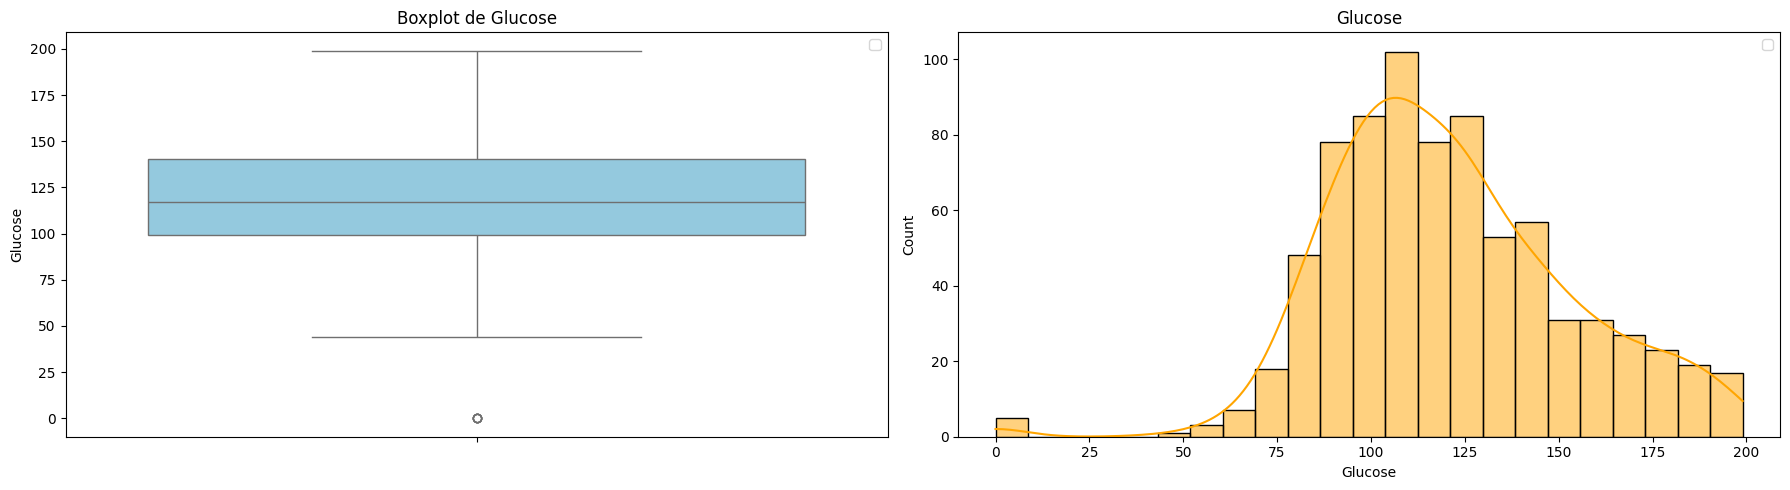

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


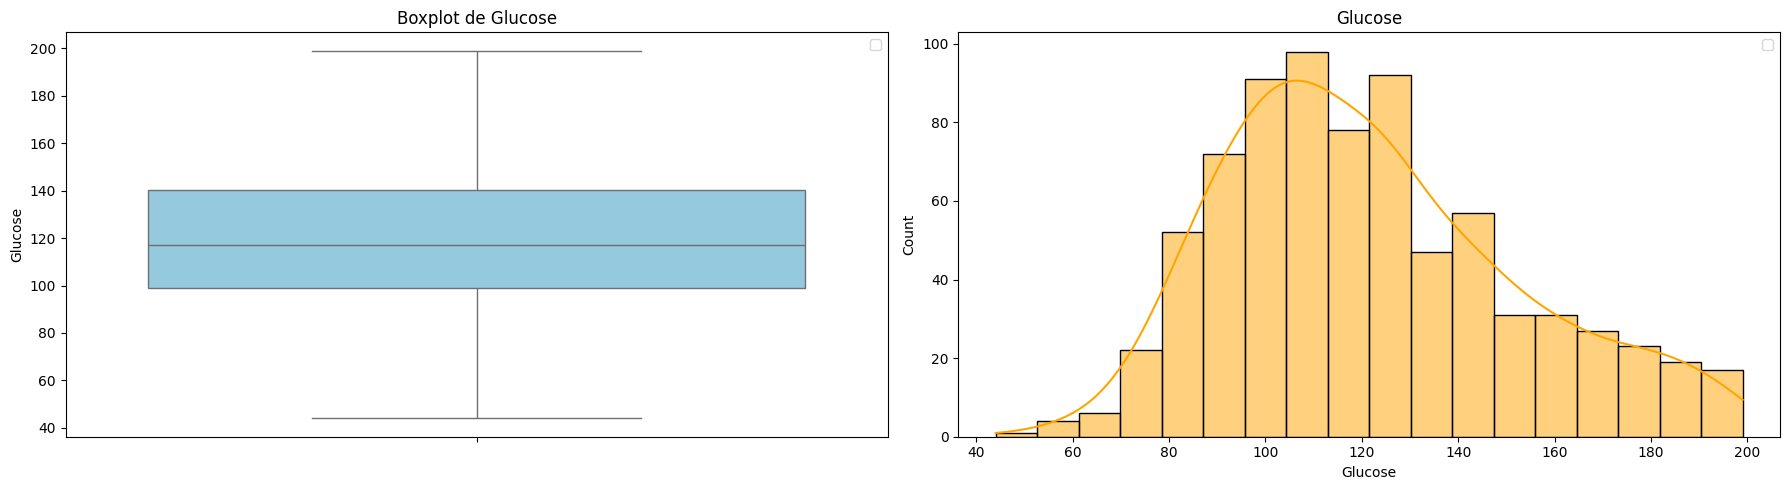

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


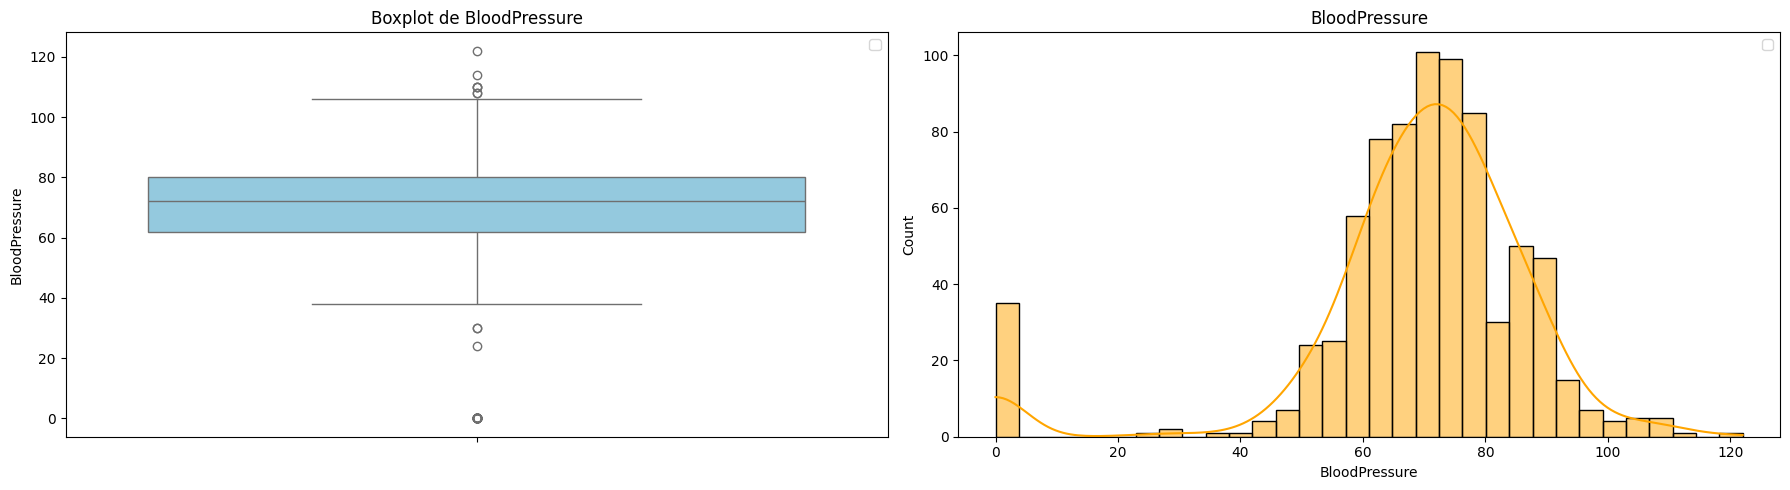

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


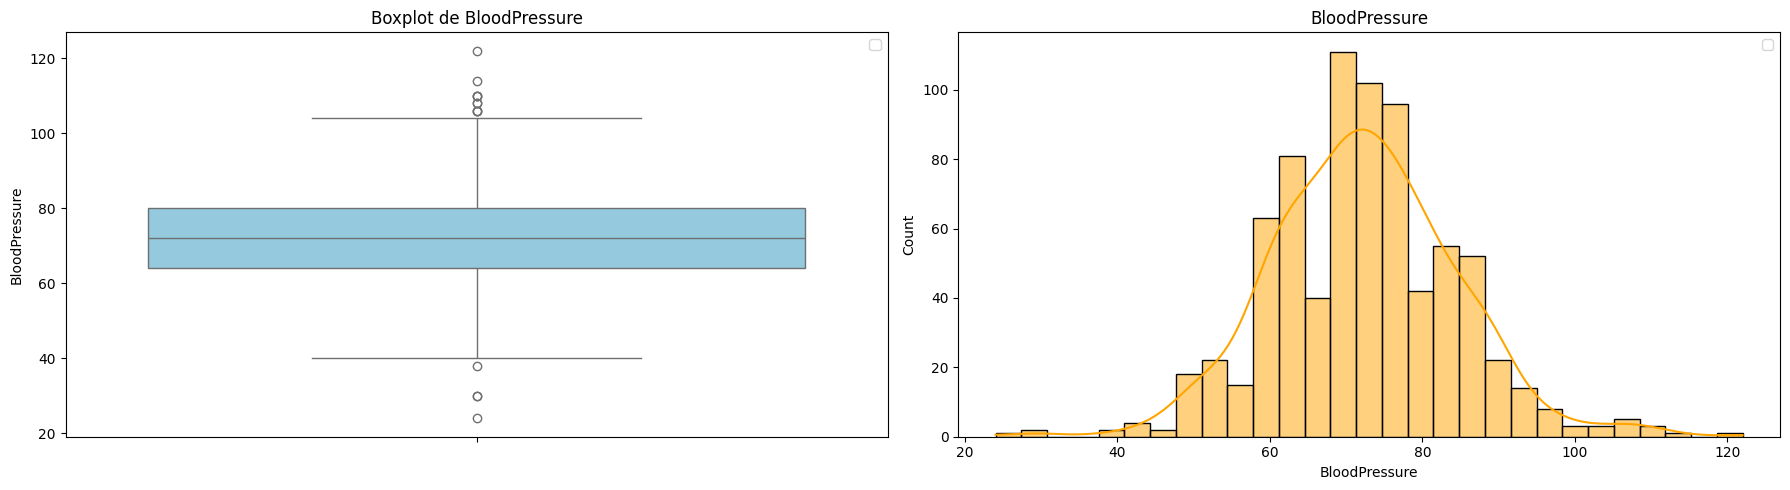

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


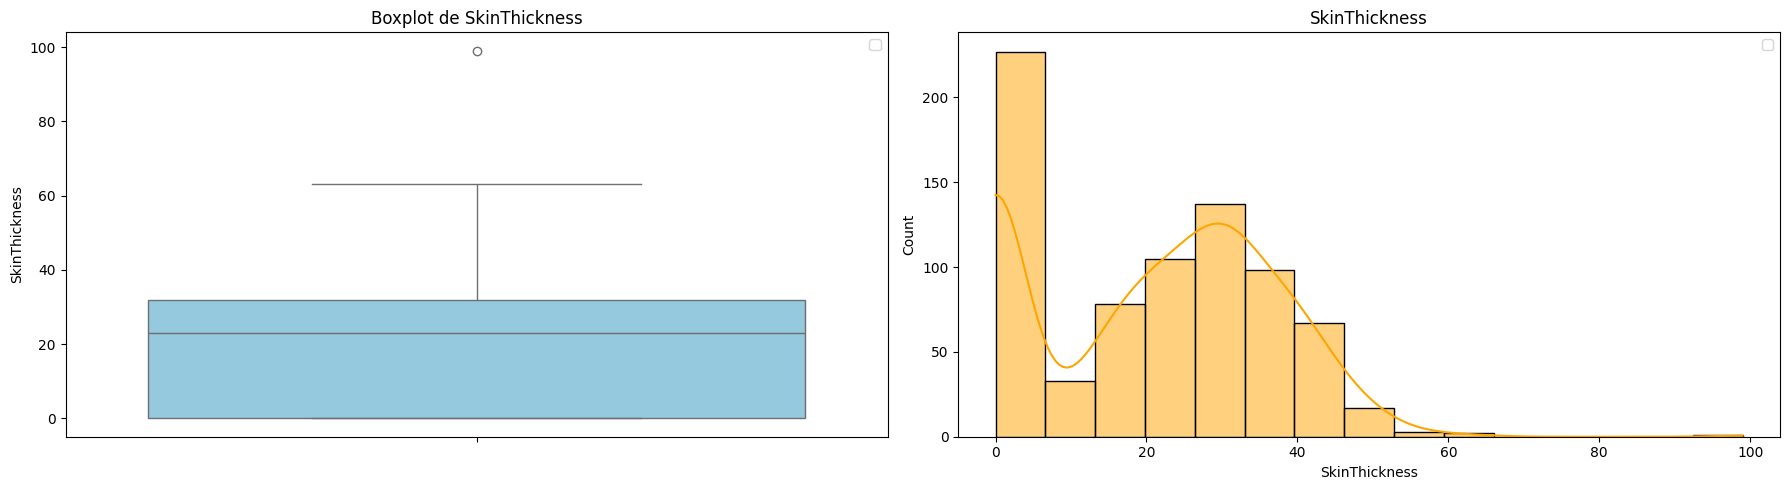

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


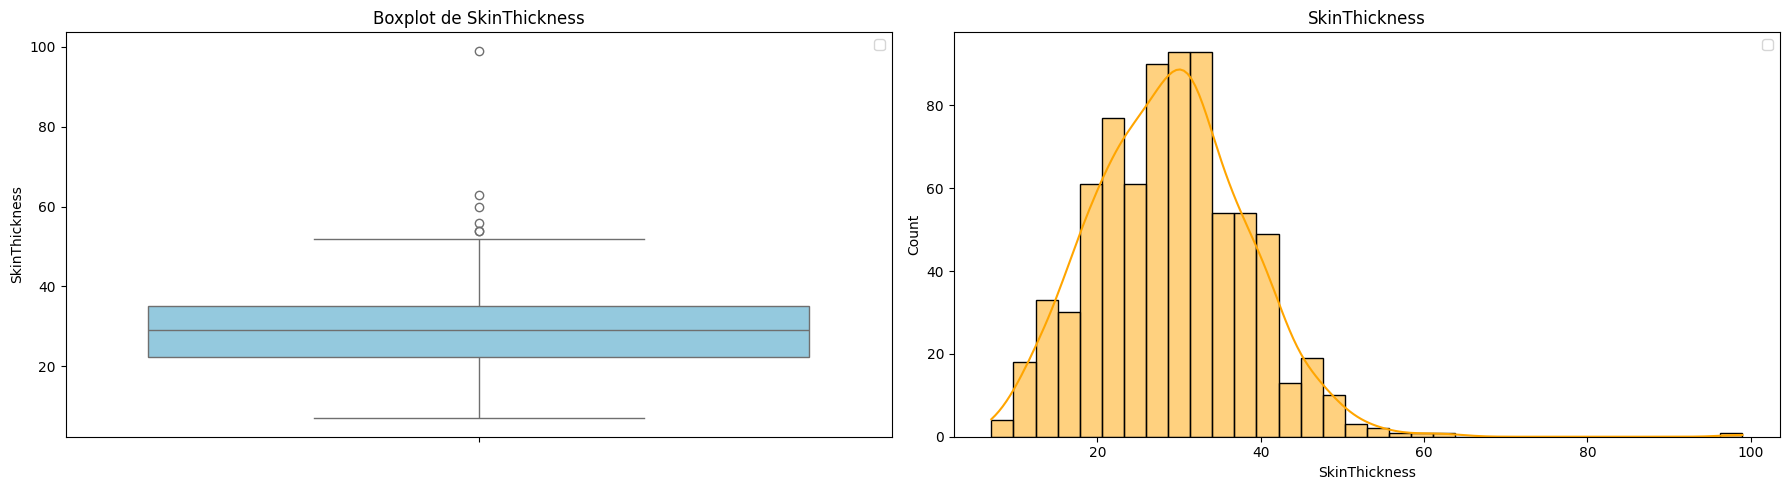

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


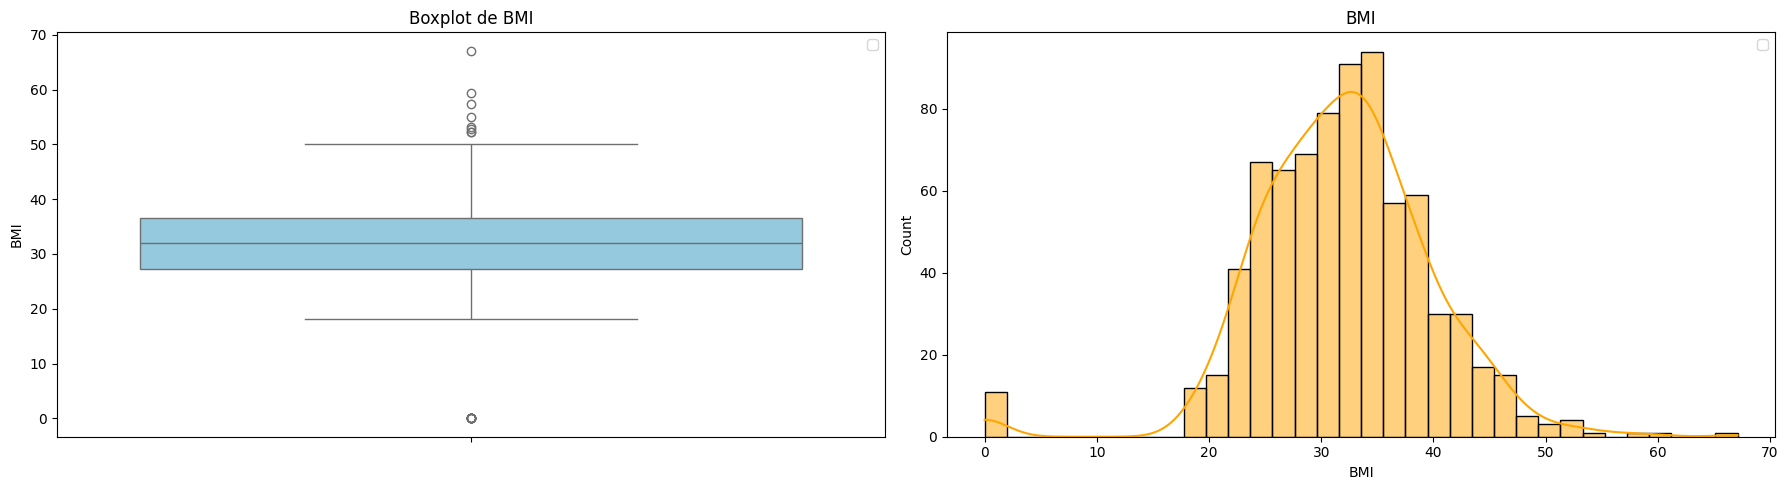

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


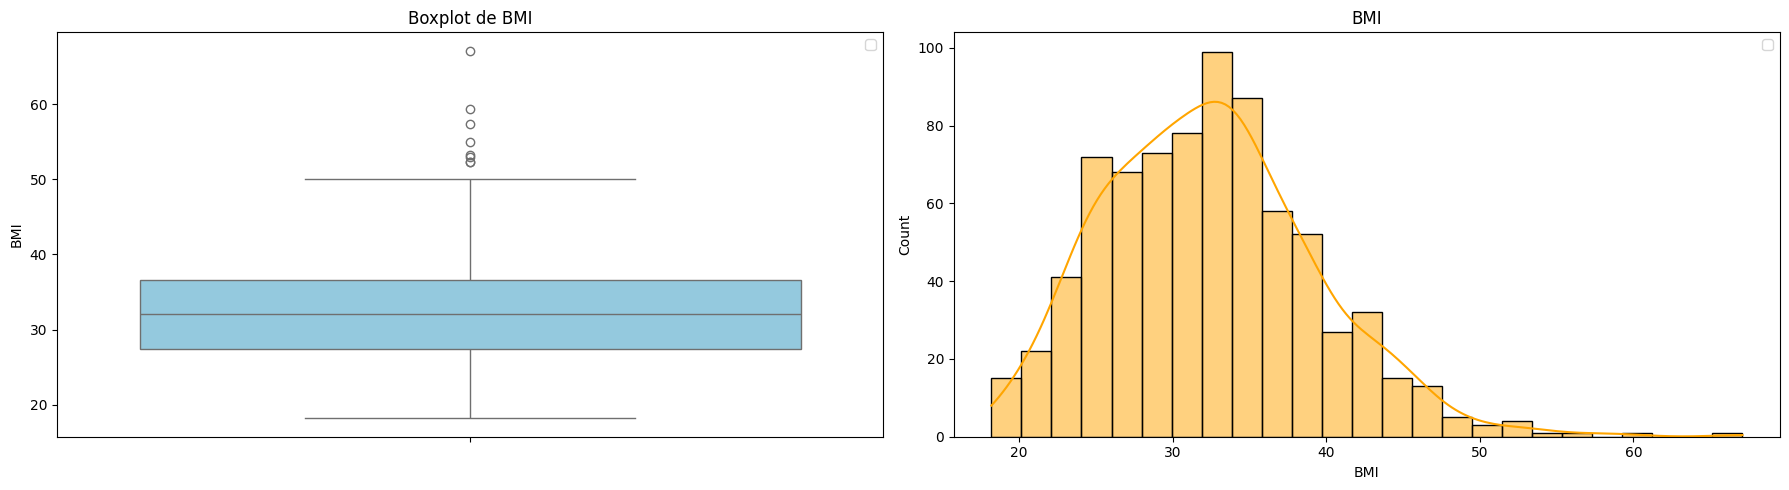

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


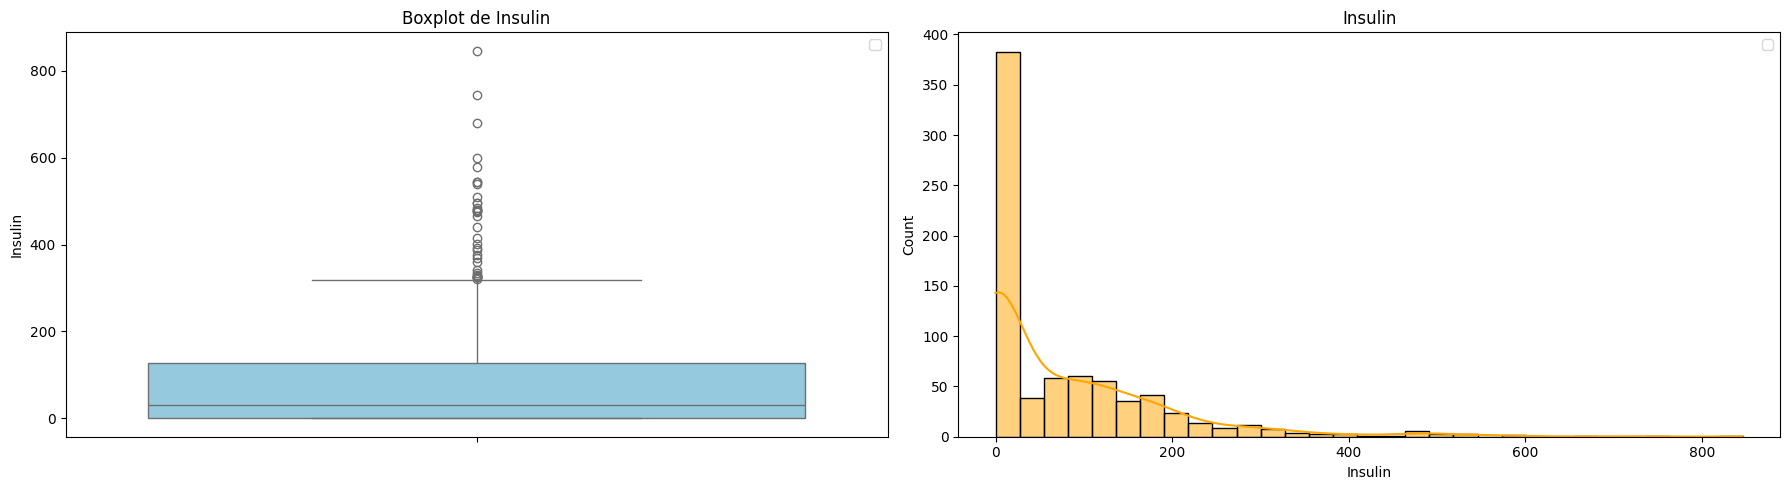

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


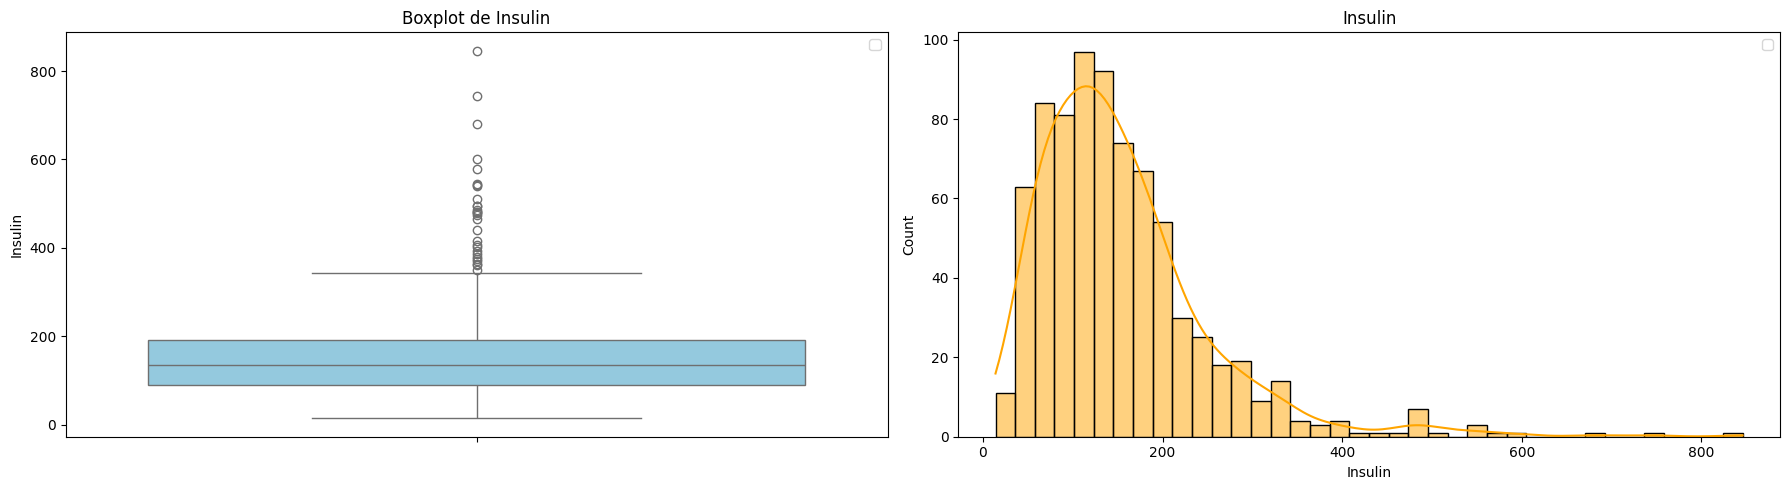

In [78]:
# Après l'application de knn sur les valeurs manquer
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
for col in columns:
    visualization(dataset, col)
    visualization(dataset_1, col)


*️⃣ Sans utiliser La standarisation Avant knn : 

In [79]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.000000    0.000000                  0.078000   21.000000  
25%      0.000000   27.300000                  0.243750   24.000000  
50%     30.500000   32.000000                  0.372500   29.000000  
75%    127.250000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

In [80]:
dataset_2 = knn_imputation_without_standarisation(dataset)

In [81]:
print("******************** Après : is null : ****************************** \n", dataset_2.isnull().sum())
dataset_2.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  121.612760      72.373698      29.203125   
std    221.846794     3.369578   30.477714      12.193237       9.169946   
min      0.000000     0.000000   44.000000      24.000000       7.000000   
25%    191.750000     1.000000   99.000000      64.000000      23.000000   
50%    383.500000     3.000000  117.000000      72.000000      29.400000   
75%    575.250000     6.000000  140.250000      80.000000      34.400000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean   153.630990   32.426328                  0.471876   33.240885  
std     99.129224    6.896203                  0.331329   11.760232  
min     14.000000   18.200000                  0.078000   21.000000  
25%     90.000000   27.475000                  0.243750   24.000000  
50%    130.000000   32.290000                  0.372500   29.000000  
75%    190.000000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

### 2️⃣ Utiliser des techniques statistiques (ex. : boîte à moustaches, z-score, IQR) pour détecter les outliers.

IQR (Pregnancies): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  1.0
Q3 (75%) :  6.0
IQR :  5.0
Nombre des outliers détectés : 86
Pourcentage f'outliers: 12.61%
Limites: [-6.50, 8.50]]
La distribution des Pregnancies avec les bornes sup/inf :


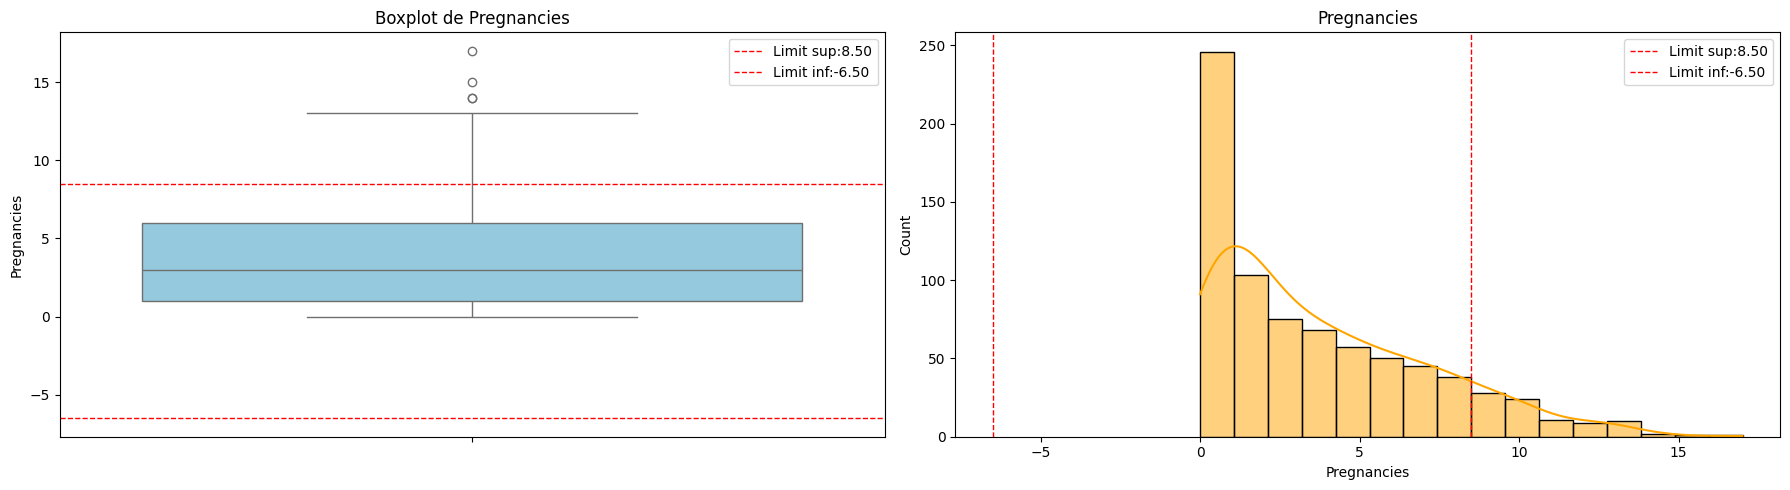

Z-SCORE (Pregnancies): *******************************************************************************************
Moyenne: 3.85
Ecart-type: 3.37
Seuil Z-SCORE: 3
Nombre des outliers détectés : 4
Pourcentage f'outliers: 0.52%
Limites: [-6.26, 13.95]
La distribution des Pregnancies avec les bornes sup/inf :


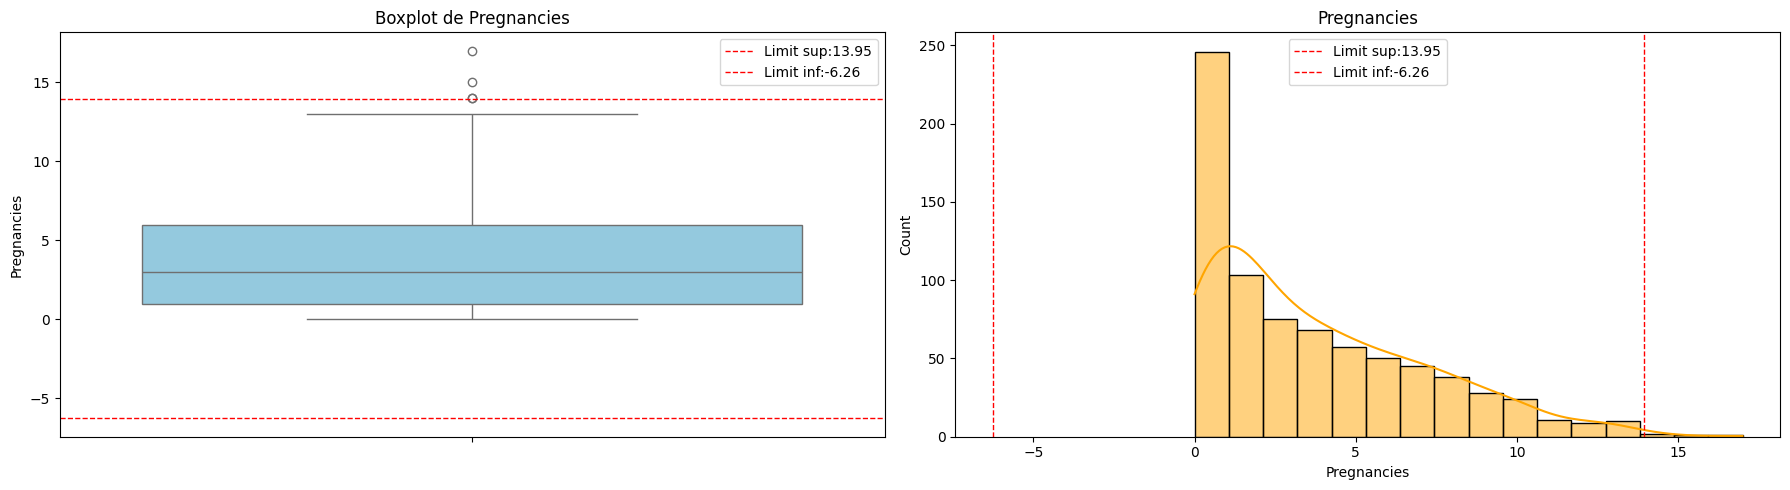

IQR (Glucose): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  99.0
Q3 (75%) :  140.25
IQR :  41.25
Nombre des outliers détectés : 101
Pourcentage f'outliers: 15.14%
Limites: [37.12, 160.88]]
La distribution des Glucose avec les bornes sup/inf :


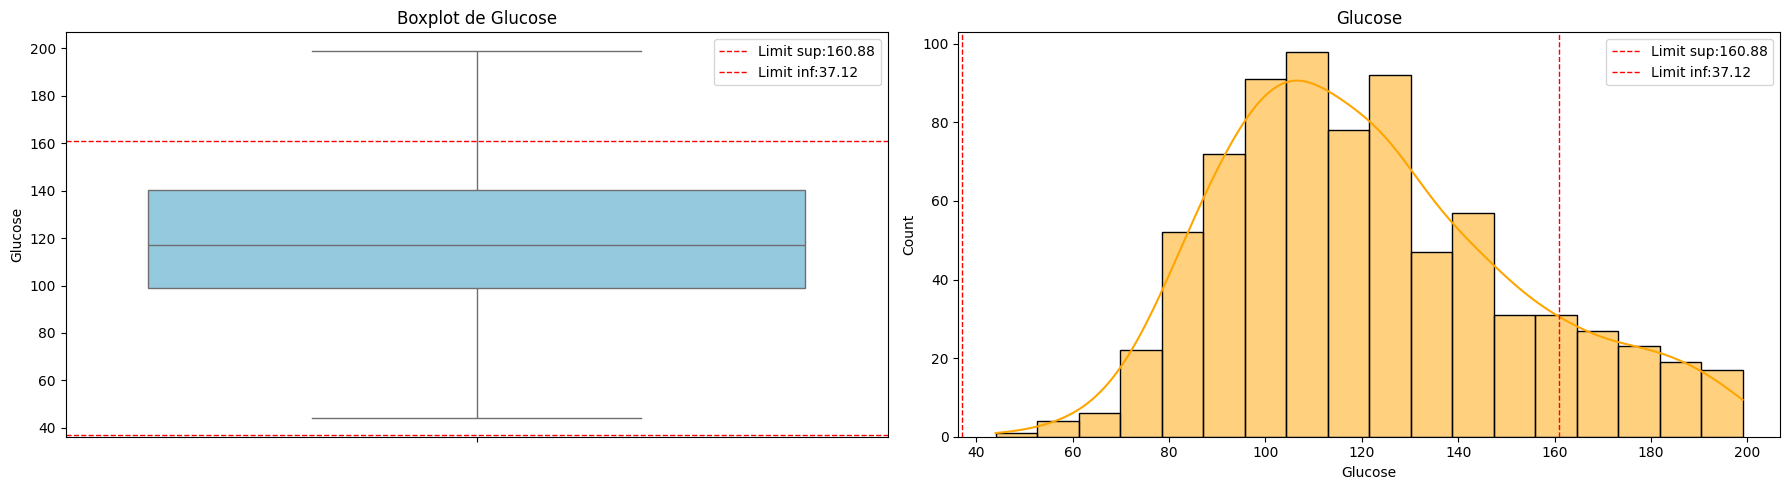

Z-SCORE (Glucose): *******************************************************************************************
Moyenne: 121.58
Ecart-type: 30.50
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [30.09, 213.08]
La distribution des Glucose avec les bornes sup/inf :


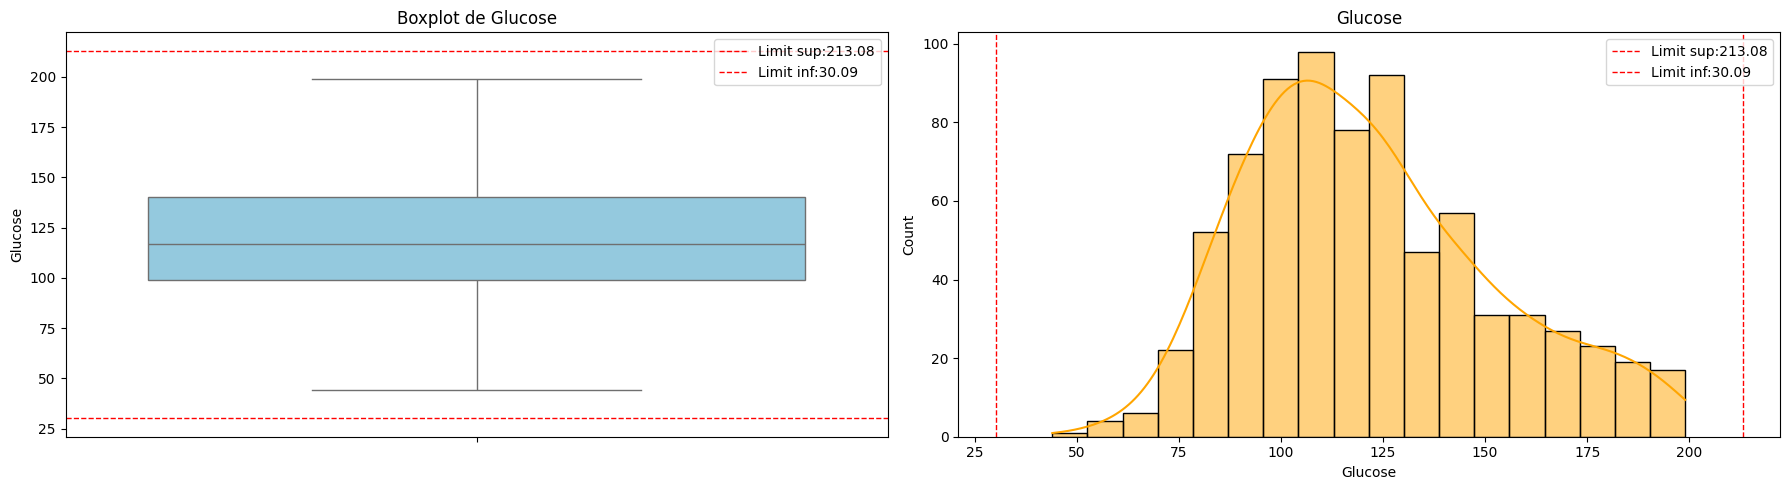

IQR (BloodPressure): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  64.0
Q3 (75%) :  80.0
IQR :  16.0
Nombre des outliers détectés : 64
Pourcentage f'outliers: 9.09%
Limites: [40.00, 88.00]]
La distribution des BloodPressure avec les bornes sup/inf :


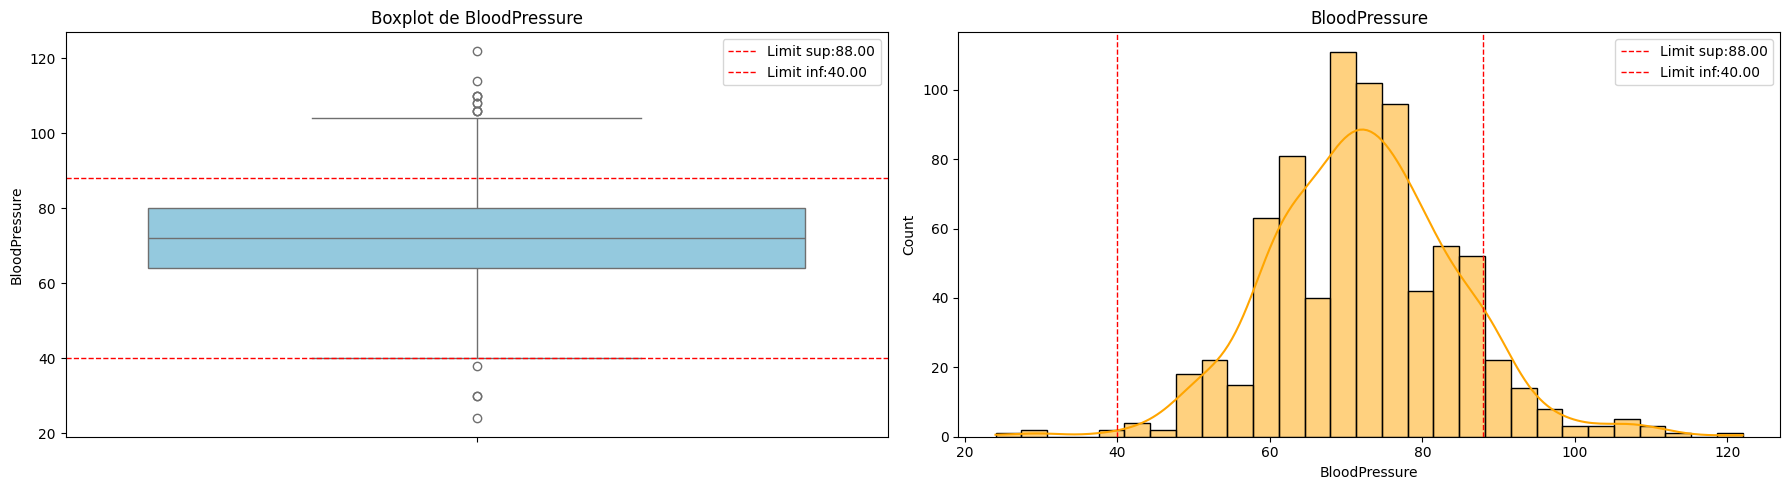

Z-SCORE (BloodPressure): *******************************************************************************************
Moyenne: 72.29
Ecart-type: 12.20
Seuil Z-SCORE: 3
Nombre des outliers détectés : 8
Pourcentage f'outliers: 1.05%
Limites: [35.70, 108.88]
La distribution des BloodPressure avec les bornes sup/inf :


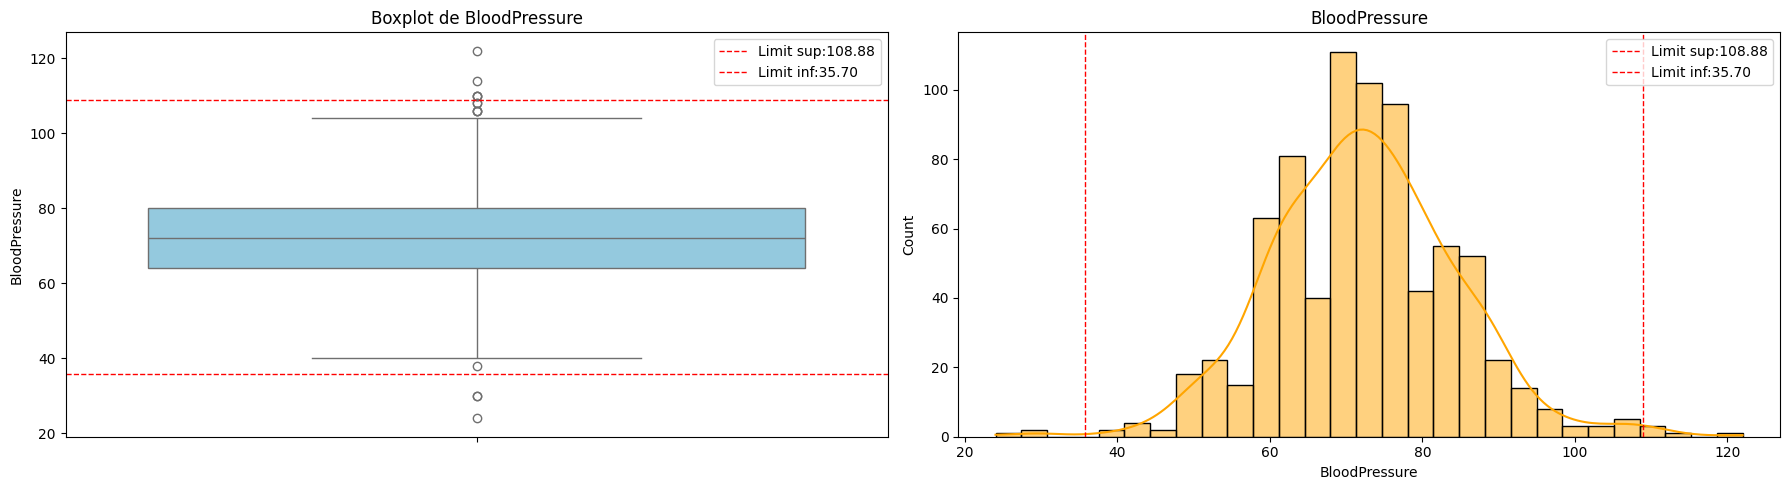

IQR (SkinThickness): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  22.400000000000002
Q3 (75%) :  35.0
IQR :  12.599999999999998
Nombre des outliers détectés : 66
Pourcentage f'outliers: 9.40%
Limites: [3.50, 41.30]]
La distribution des SkinThickness avec les bornes sup/inf :


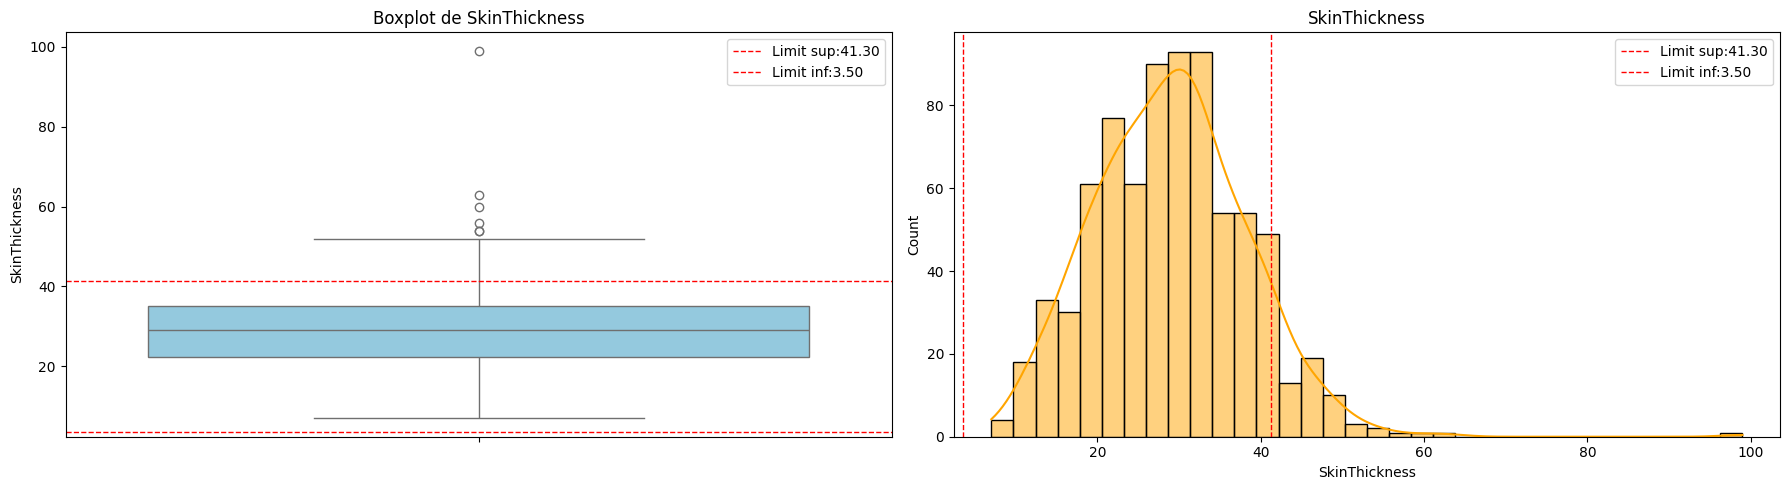

Z-SCORE (SkinThickness): *******************************************************************************************
Moyenne: 28.98
Ecart-type: 9.45
Seuil Z-SCORE: 3
Nombre des outliers détectés : 3
Pourcentage f'outliers: 0.39%
Limites: [0.64, 57.31]
La distribution des SkinThickness avec les bornes sup/inf :


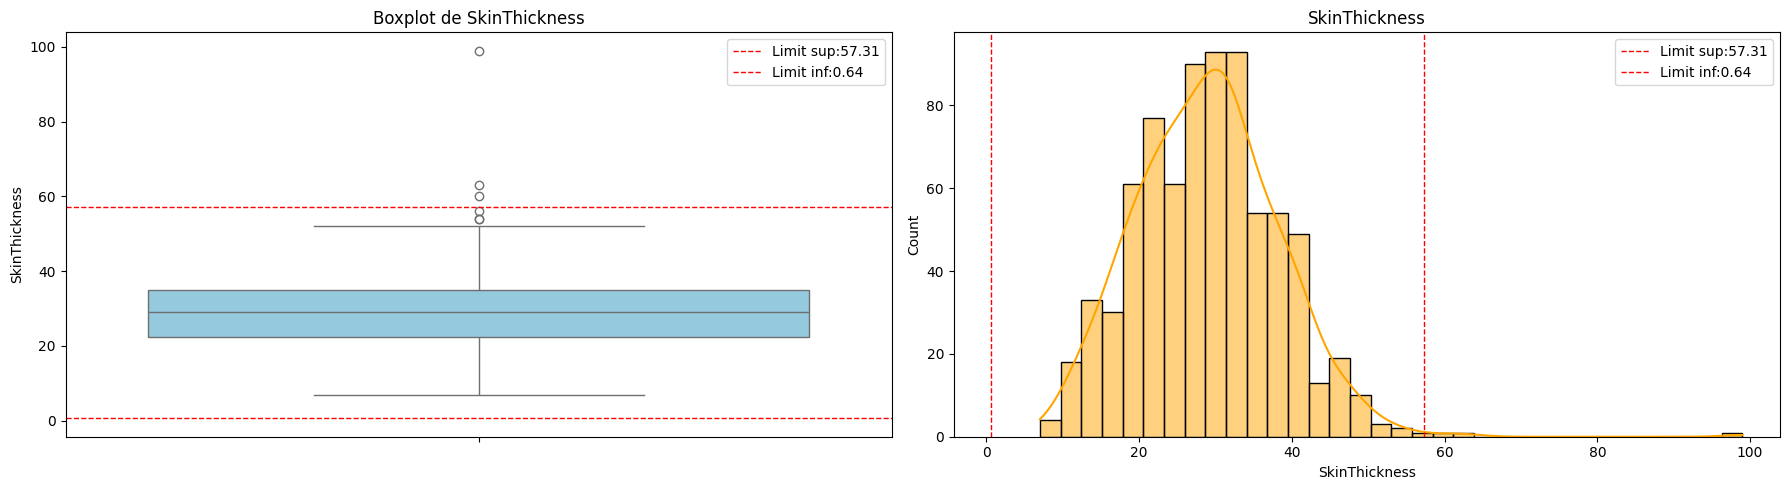

IQR (Insulin): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  88.95
Q3 (75%) :  191.05
IQR :  102.10000000000001
Nombre des outliers détectés : 103
Pourcentage f'outliers: 15.49%
Limites: [-64.20, 242.10]]
La distribution des Insulin avec les bornes sup/inf :


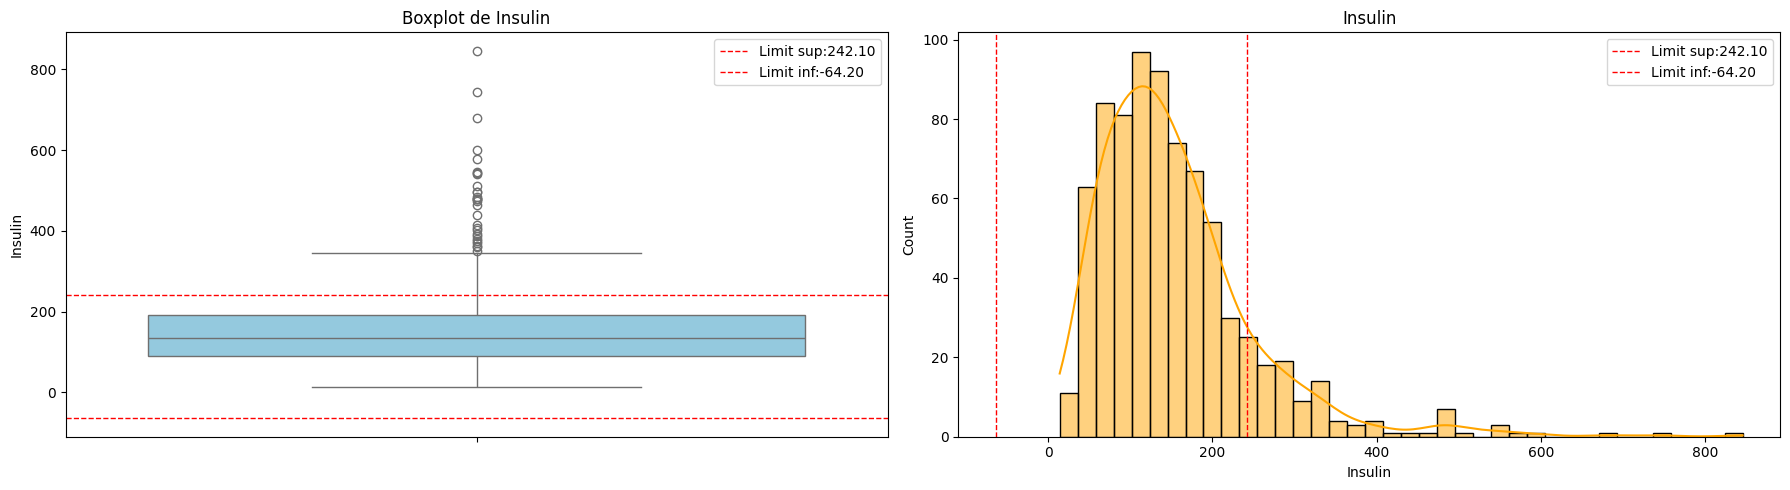

Z-SCORE (Insulin): *******************************************************************************************
Moyenne: 154.78
Ecart-type: 97.97
Seuil Z-SCORE: 3
Nombre des outliers détectés : 17
Pourcentage f'outliers: 2.26%
Limites: [-139.13, 448.69]
La distribution des Insulin avec les bornes sup/inf :


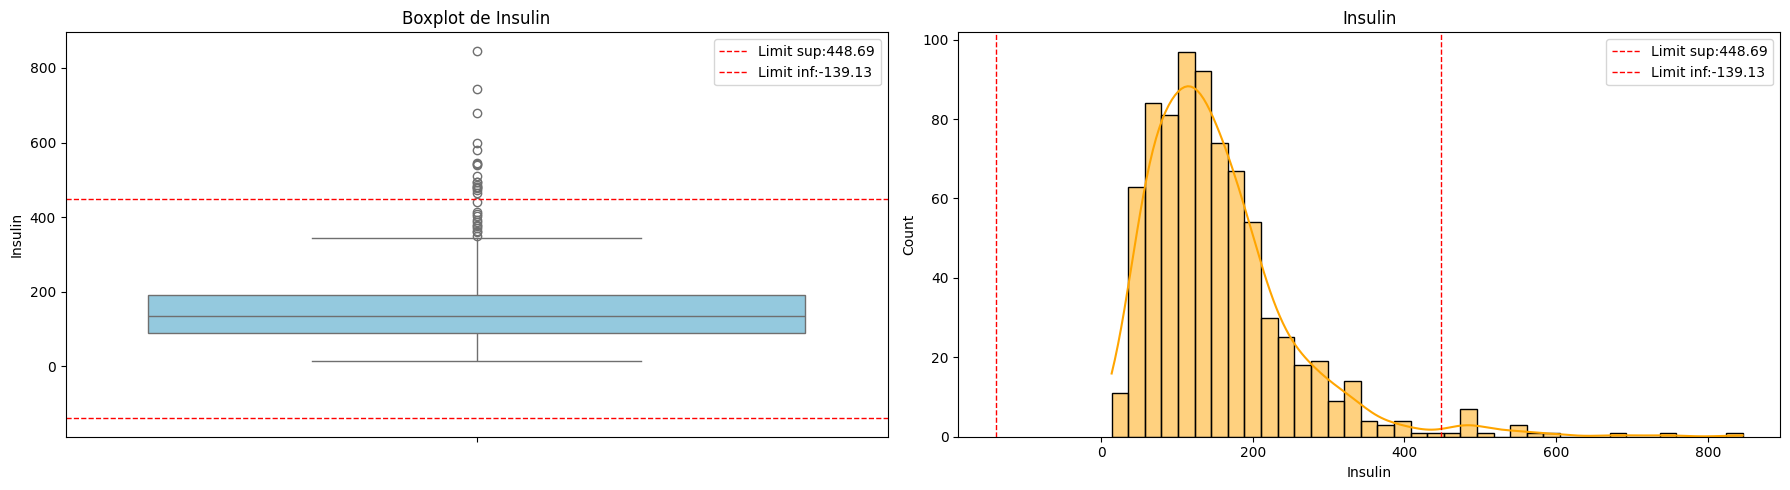

IQR (BMI): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  27.4
Q3 (75%) :  36.6
IQR :  9.200000000000003
Nombre des outliers détectés : 81
Pourcentage f'outliers: 11.79%
Limites: [13.60, 41.20]]
La distribution des BMI avec les bornes sup/inf :


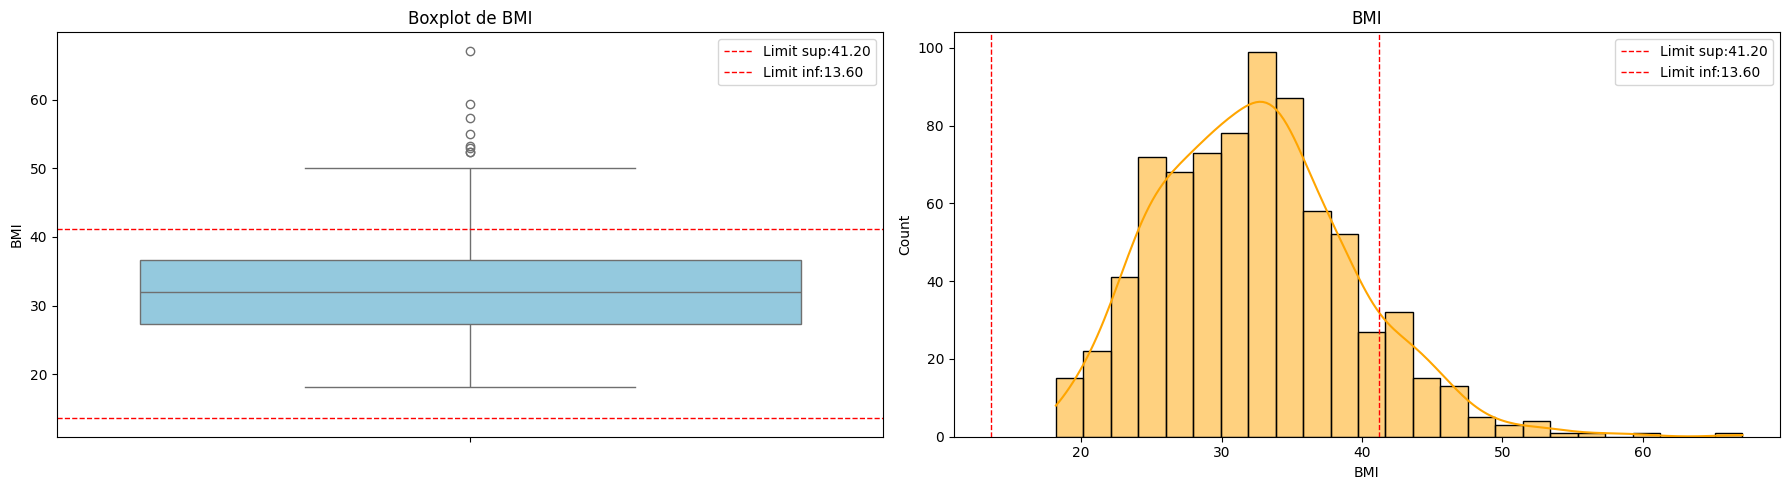

Z-SCORE (BMI): *******************************************************************************************
Moyenne: 32.40
Ecart-type: 6.90
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [11.71, 53.10]
La distribution des BMI avec les bornes sup/inf :


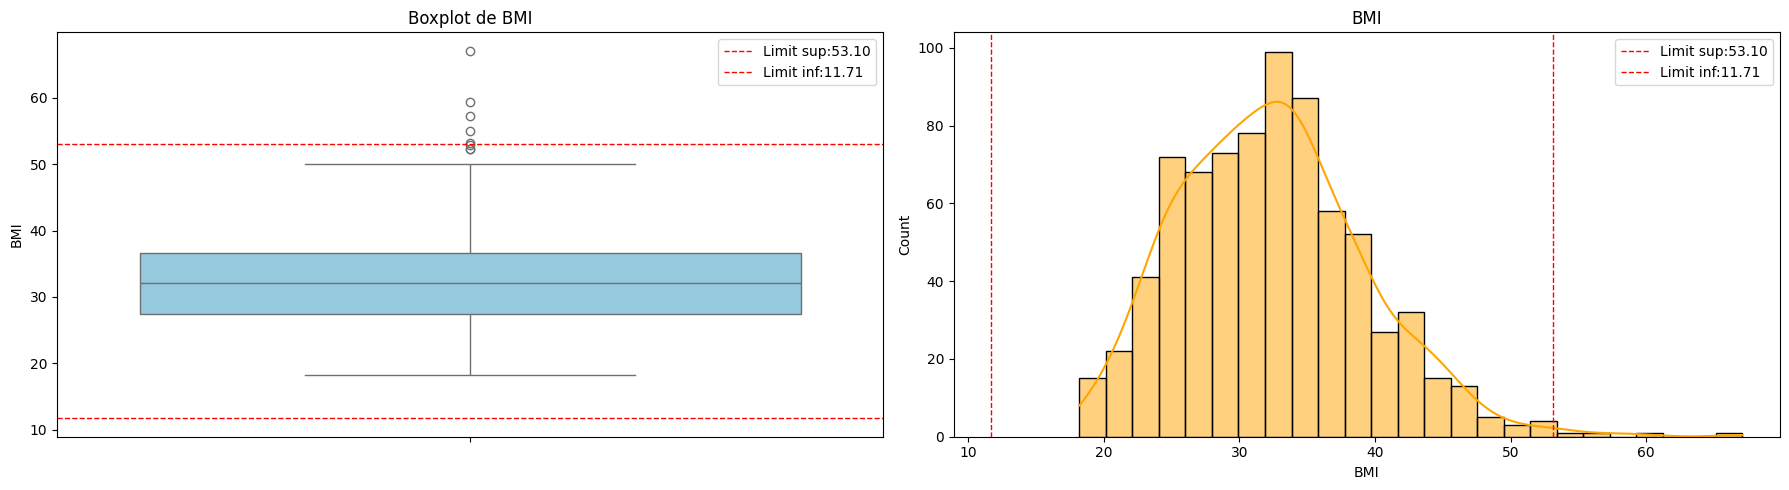

IQR (DiabetesPedigreeFunction): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  0.24375
Q3 (75%) :  0.62625
IQR :  0.38249999999999995
Nombre des outliers détectés : 97
Pourcentage f'outliers: 14.46%
Limites: [-0.33, 0.82]]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


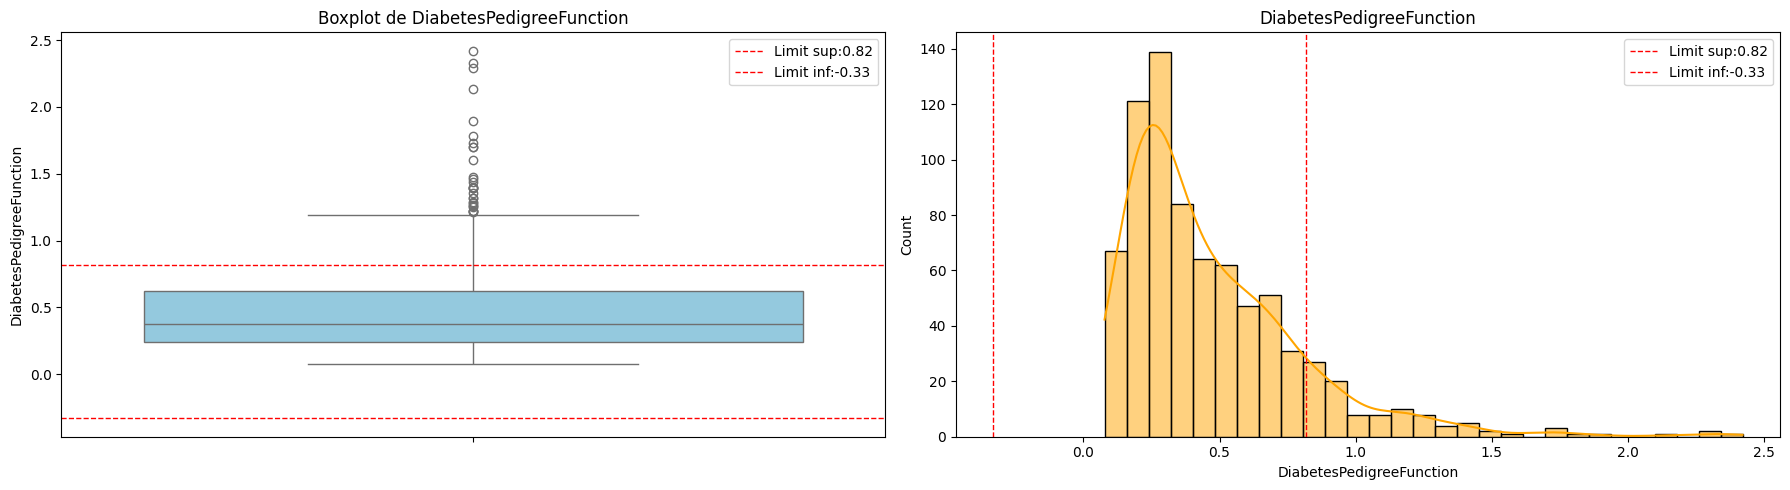

Z-SCORE (DiabetesPedigreeFunction): *******************************************************************************************
Moyenne: 0.47
Ecart-type: 0.33
Seuil Z-SCORE: 3
Nombre des outliers détectés : 11
Pourcentage f'outliers: 1.45%
Limites: [-0.52, 1.47]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


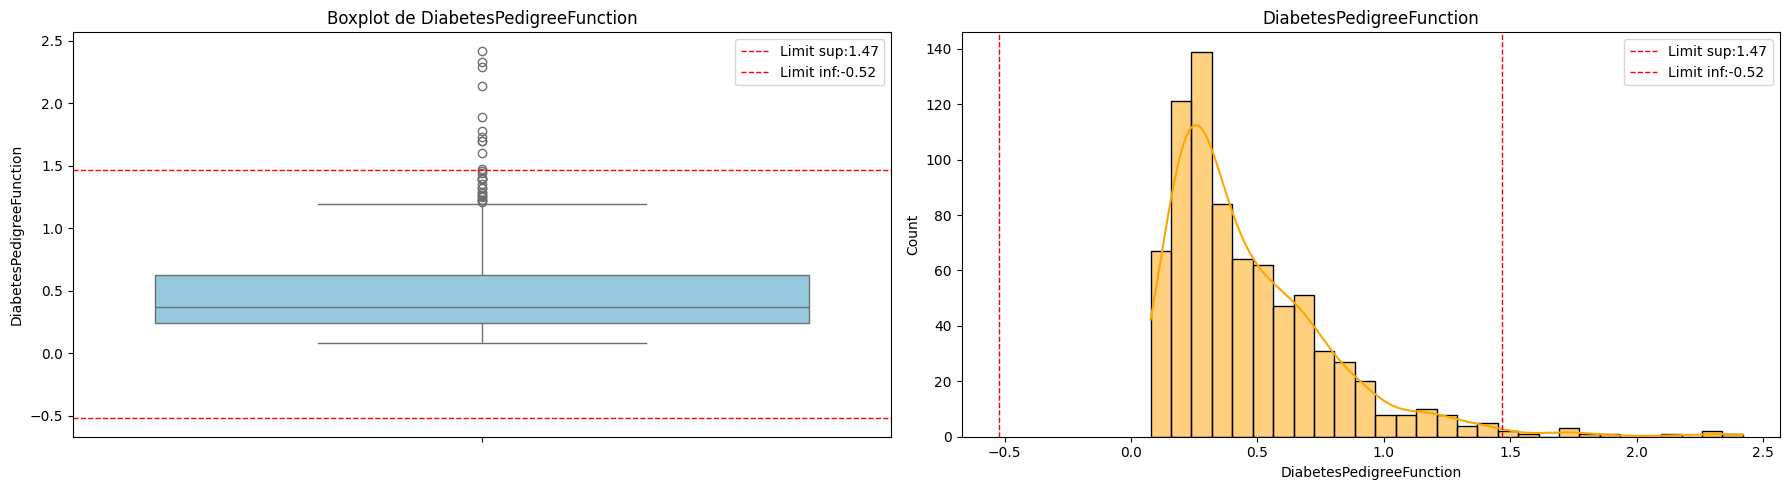

IQR (Age): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  24.0
Q3 (75%) :  41.0
IQR :  17.0
Nombre des outliers détectés : 89
Pourcentage f'outliers: 13.11%
Limites: [-1.50, 49.50]]
La distribution des Age avec les bornes sup/inf :


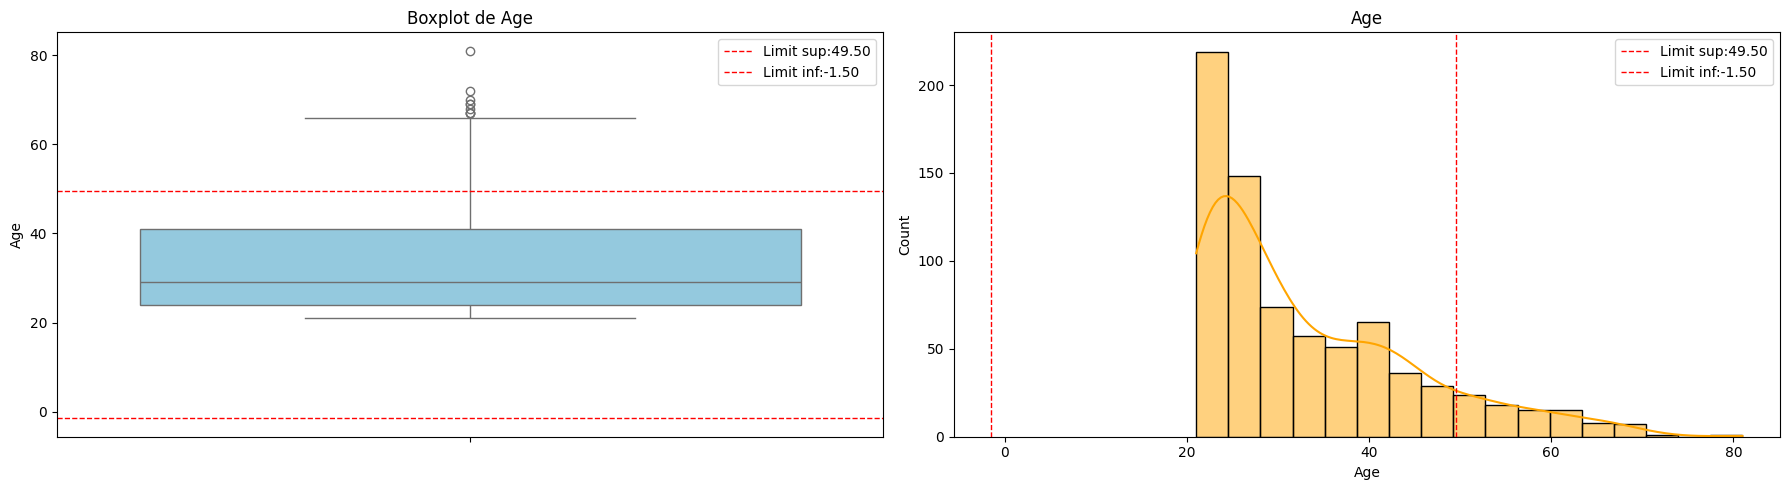

Z-SCORE (Age): *******************************************************************************************
Moyenne: 33.24
Ecart-type: 11.76
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [-2.04, 68.52]
La distribution des Age avec les bornes sup/inf :


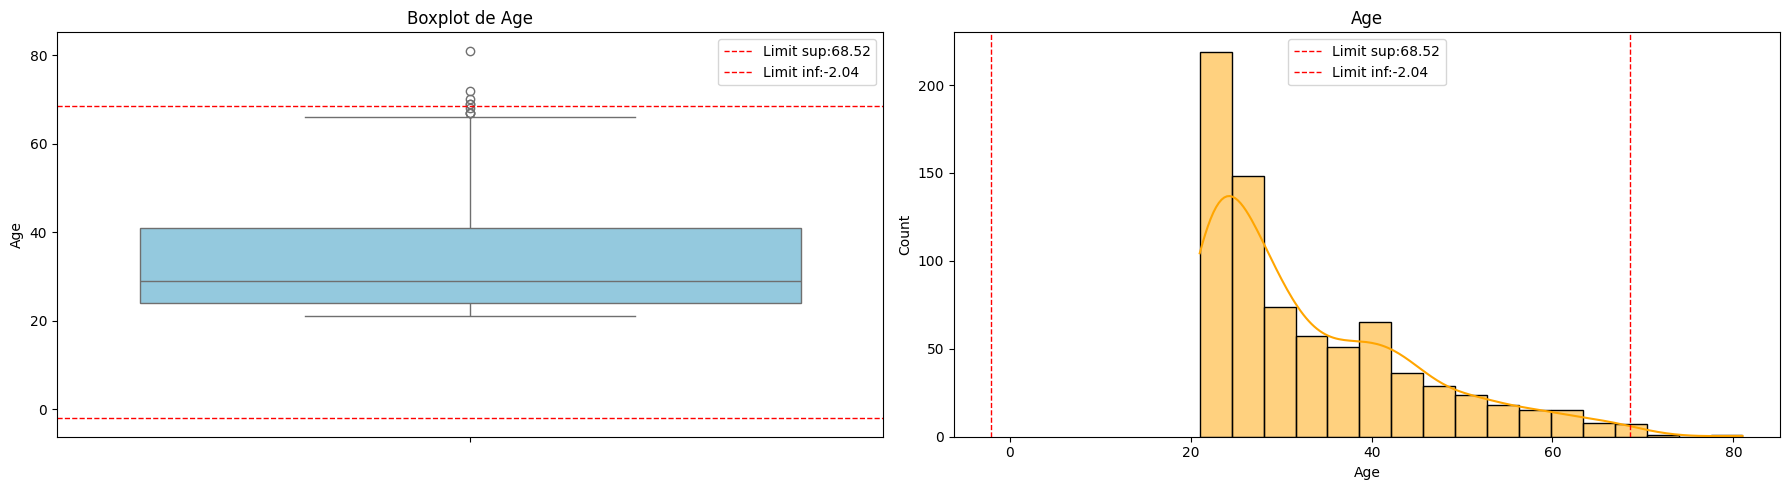

In [82]:
columns_iqr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_zscore = []
for col in columns_iqr:
    print(f"IQR ({col}): *******************************************************************************************")
    detecte_outliers_with_iqr(dataset_1, col )
    print(f"Z-SCORE ({col}): *******************************************************************************************")
    detect_outliers_z_score(dataset_1, col)

Tableau des résultats : 

<table border="1" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
    <thead>
        <tr style="background-color: #4CAF50; color: white;">
            <th>Variable</th>
            <th>N Outliers Z-Score</th>
            <th>% Outliers Z-Score</th>
            <th>N Outliers IQR</th>
            <th>% Outliers IQR</th>
            <th>Méthode Choisie</th>
            <th>Justification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Pregnancies</strong></td>
            <td>4</td>
            <td>0.52%</td>
            <td>86</td>
            <td>12.61%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution raisonnable, Z-score conserve + de données</td>
        </tr>
        <tr>
            <td><strong>Glucose</strong></td>
            <td>0</td>
            <td>0.00%</td>
            <td>101</td>
            <td>15.14%</td>
            <td><strong>Z-Score</strong></td>
            <td>Aucun outlier avec Z-score, distribution normale</td>
        </tr>
        <tr>
            <td><strong>BloodPressure</strong></td>
            <td>8</td>
            <td>1.05%</td>
            <td>64</td>
            <td>9.09%</td>
            <td><strong>Z-Score</strong></td>
            <td>Z-score moins restrictif, préserve l'information médicale</td>
        </tr>
        <tr>
            <td><strong>SkinThickness</strong></td>
            <td>3</td>
            <td>0.39%</td>
            <td>66</td>
            <td>9.40%</td>
            <td><strong>Z-Score</strong></td>
            <td>Faible % d'outliers avec Z-score, méthode conservative</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>Insulin</strong></td>
            <td>17</td>
            <td>2.26%</td>
            <td>103</td>
            <td>15.49%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution très asymétrique → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>BMI</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>81</td>
            <td>11.79%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution acceptable, Z-score préserve les données</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>DiabetesPedigreeFunction</strong></td>
            <td>11</td>
            <td>1.45%</td>
            <td>97</td>
            <td>14.46%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Asymétrie importante → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>Age</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>89</td>
            <td>13.11%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution normale, Z-score adapté</td>
        </tr>
    </tbody>
</table>

### 3️⃣ Gérer les lignes contenant des valeurs aberrantes dans les colonnes pertinentes.

#### *️⃣ Appliquer log1p sur les colonnes des distributions asymétriques: 

In [83]:
dataset_2.describe()

Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  121.612760      72.373698      29.203125   
std    221.846794     3.369578   30.477714      12.193237       9.169946   
min      0.000000     0.000000   44.000000      24.000000       7.000000   
25%    191.750000     1.000000   99.000000      64.000000      23.000000   
50%    383.500000     3.000000  117.000000      72.000000      29.400000   
75%    575.250000     6.000000  140.250000      80.000000      34.400000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean   153.630990   32.426328                  0.471876   33.240885  
std     99.129224    6.896203                  0.331329   11.760232  
min     14.000000   18.200000                  0.078000   21.000000  
25%     90.000000   27.475000                  0.243750   24.000000  
50%    130.000000   32.290000                  0.372500   29.000000  
75%    190.000000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


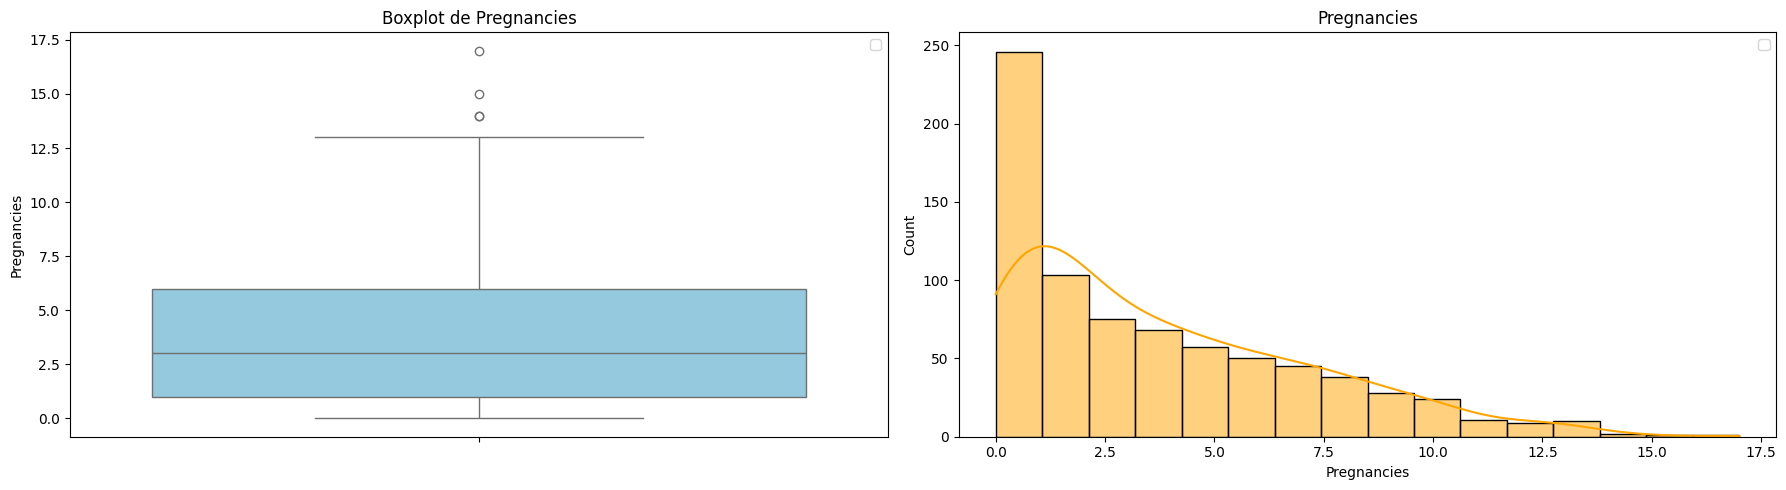

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


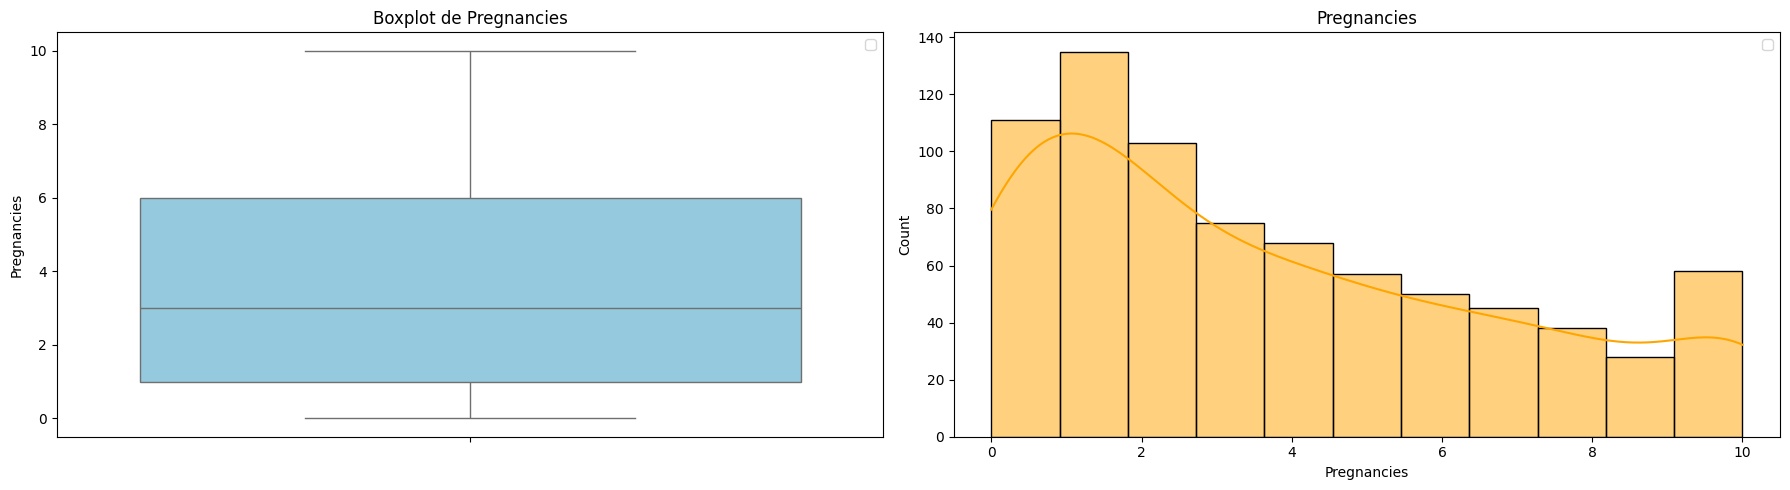

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


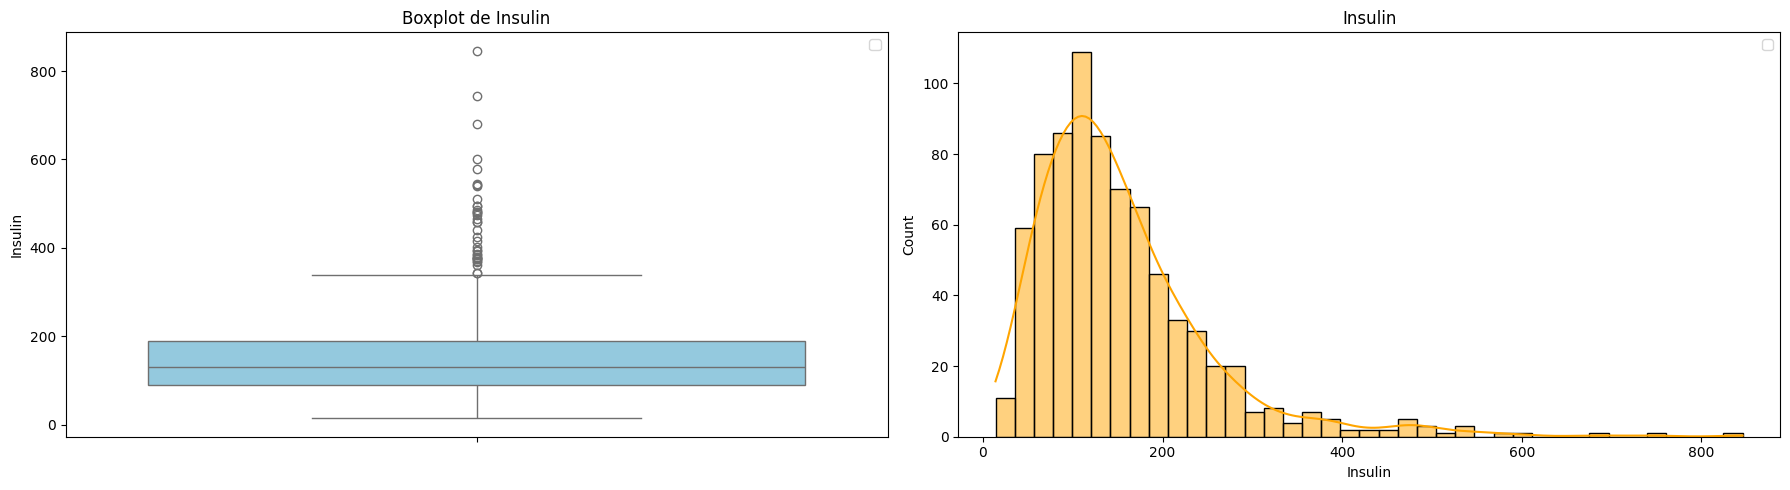

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


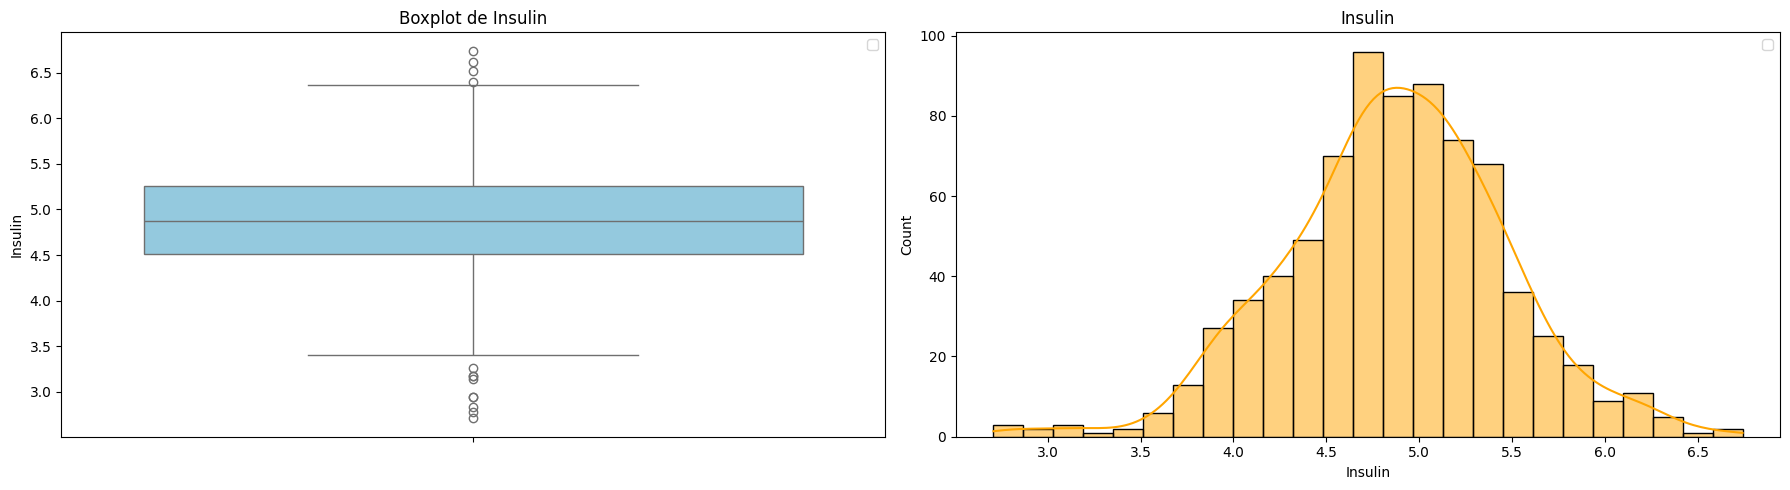

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


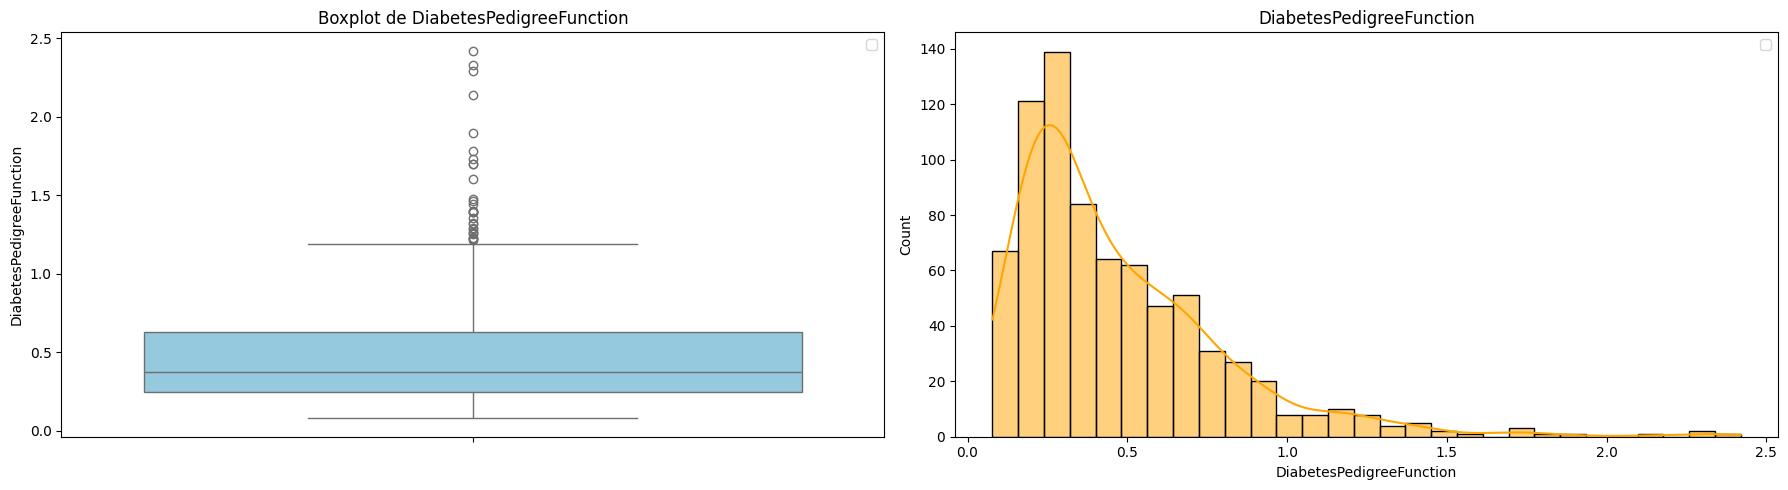

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


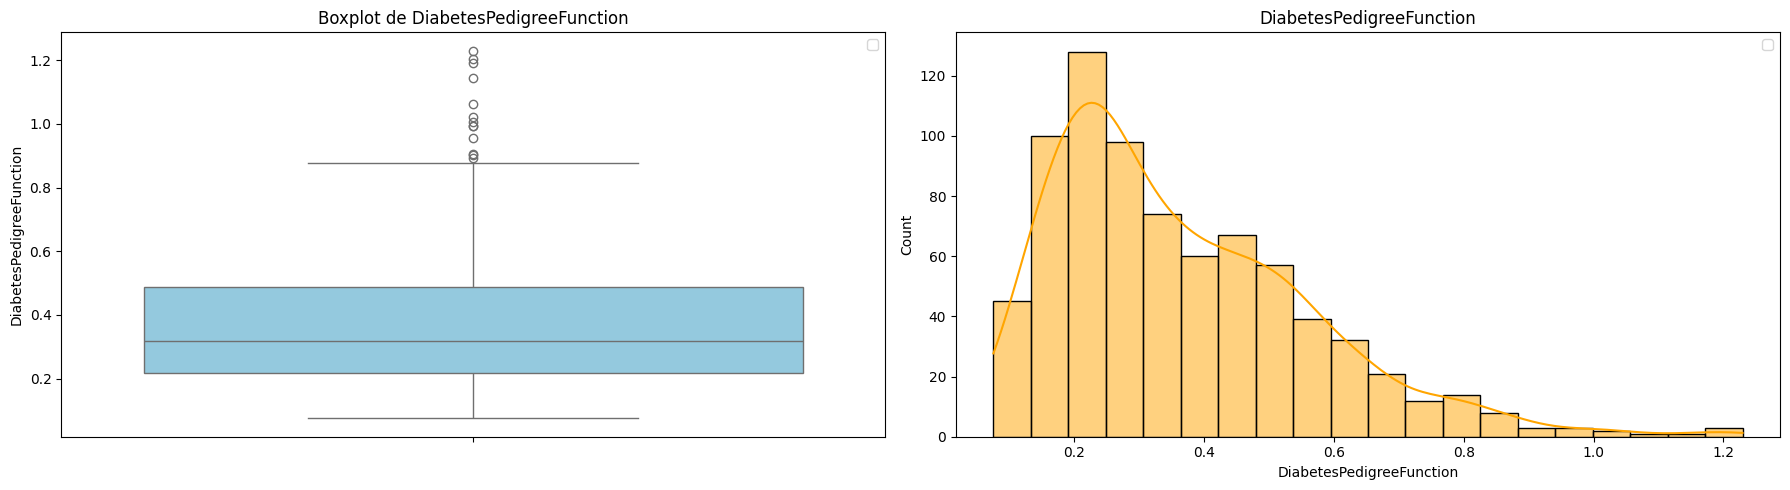

In [84]:
def preparation_finale_model(df):
    df_prepare = df.copy()
    
    df_prepare['Insulin'] = np.log1p(df['Insulin'])
    df_prepare['DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])
    df_prepare['Pregnancies'] = winsorize(df['Pregnancies'], limits=[0.05, 0.05])
    
    return df_prepare

df_prepare = preparation_finale_model(dataset_2)

columns_problems = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

for col in columns_problems:
    visualization(dataset_2, col)
    visualization(df_prepare, col)

#### *️⃣ Appliquer le z-score sur toutes les colonnes : 

In [85]:

df_prepare_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

total_outliers = 0

dataset_3 = df_prepare

# for col in df_prepare_columns:
#     dataset_3, n_outliers, outliers, inf_limit, sup_limit  = detect_remote_outliers_z_score(dataset_3, col)
#     total_outliers = total_outliers + n_outliers
    
# print("Nombre total des outliers : ", total_outliers)
# print("Dataset Shape : ", dataset_3.shape)

### 4️⃣ Étudier les relations entre les variables.

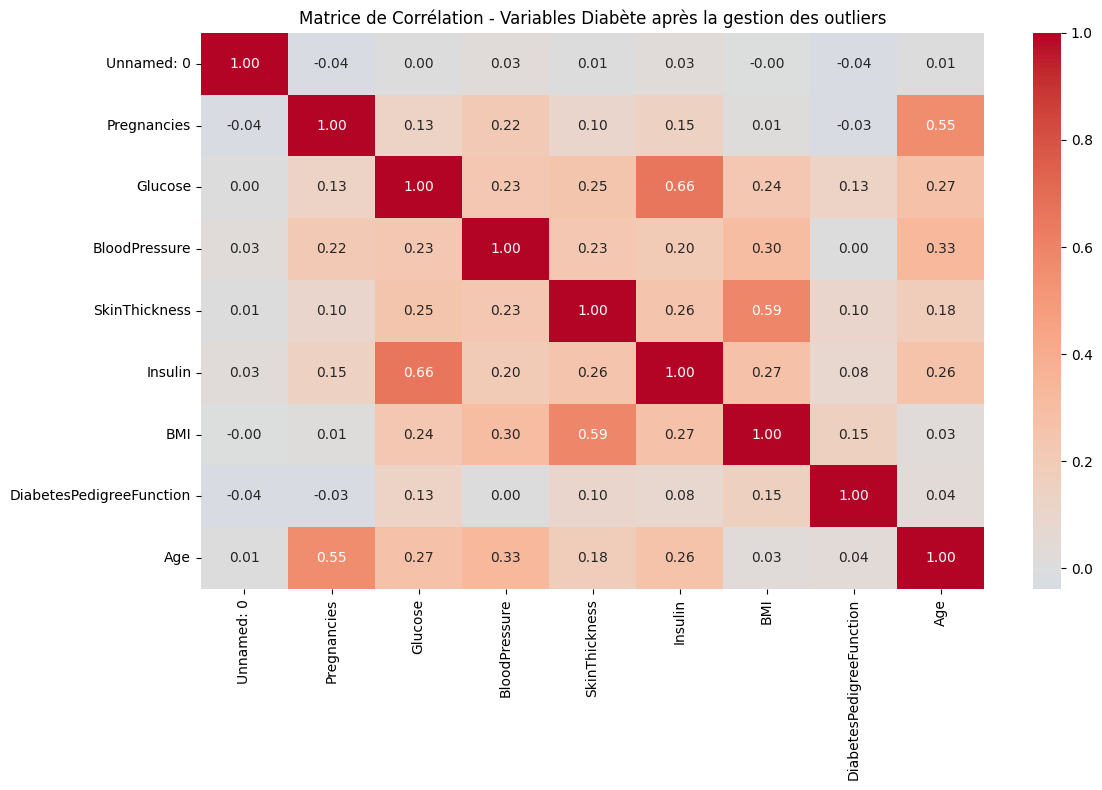

In [86]:
plt.figure(figsize=(12, 8))
sbn.heatmap(dataset_3.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation - Variables Diabète après la gestion des outliers')
plt.tight_layout()
plt.show()

<table style="border-collapse:collapse; width:100%; max-width:900px; font-family:Arial, sans-serif;">
  <thead>
    <tr style="background:#f2f2f2;">
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Variables corrélées</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Coefficient r</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Type de relation</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – Insulin</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.67</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une glycémie élevée est souvent associée à une sécrétion plus forte d’insuline.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>SkinThickness – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.60</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une épaisseur cutanée importante est généralement observée chez les personnes avec un IMC élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Pregnancies – Age</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.57</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée à forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Plus la femme est âgée, plus le nombre de grossesses est élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>BloodPressure – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.31</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une tension artérielle légèrement corrélée à l’IMC (poids).</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – BloodPressure</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.22</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une légère relation entre la glycémie et la pression artérielle.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Autres relations</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">&lt; 0.2</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible</td>
      <td style="border:1px solid #ddd; padding:8px;">Peu de dépendance entre ces variables.</td>
    </tr>
  </tbody>
</table>


Conclusion : 

* Les corrélations fortes (r > 0.5) indiquent des relations physiologiques cohérentes.
* Aucune corrélation excessive (> 0.8), donc pas de multicolinéarité importante.
* Les variables peuvent être conservées ensemble pour la modélisation.

### 5️⃣ Sélectionner les variables présentant la plus grande variabilité.

L’analyse de la variance et de la corrélation montre que les variables les plus informatives sont :

 ➕ Glucose → corrélé à Insulin et BloodPressure → indicateur clé du diabète.

 ➕ Insulin → forte variabilité et lien métabolique direct.

 ➕ BMI → relié à SkinThickness, indicateur d’obésité.

 ➕ Age → impacte le nombre de grossesses et le risque de diabète.

 ➕ Pregnancies → spécifique aux femmes, utile pour le modèle.

🔹 Ces cinq variables présentent une forte variabilité et une corrélation pertinente avec d’autres facteurs → elles seront prioritaires pour l’entraînement du modèle.

### 6️⃣ Visualiser les relations entre les variables via des outils graphiques comme le pairplot.

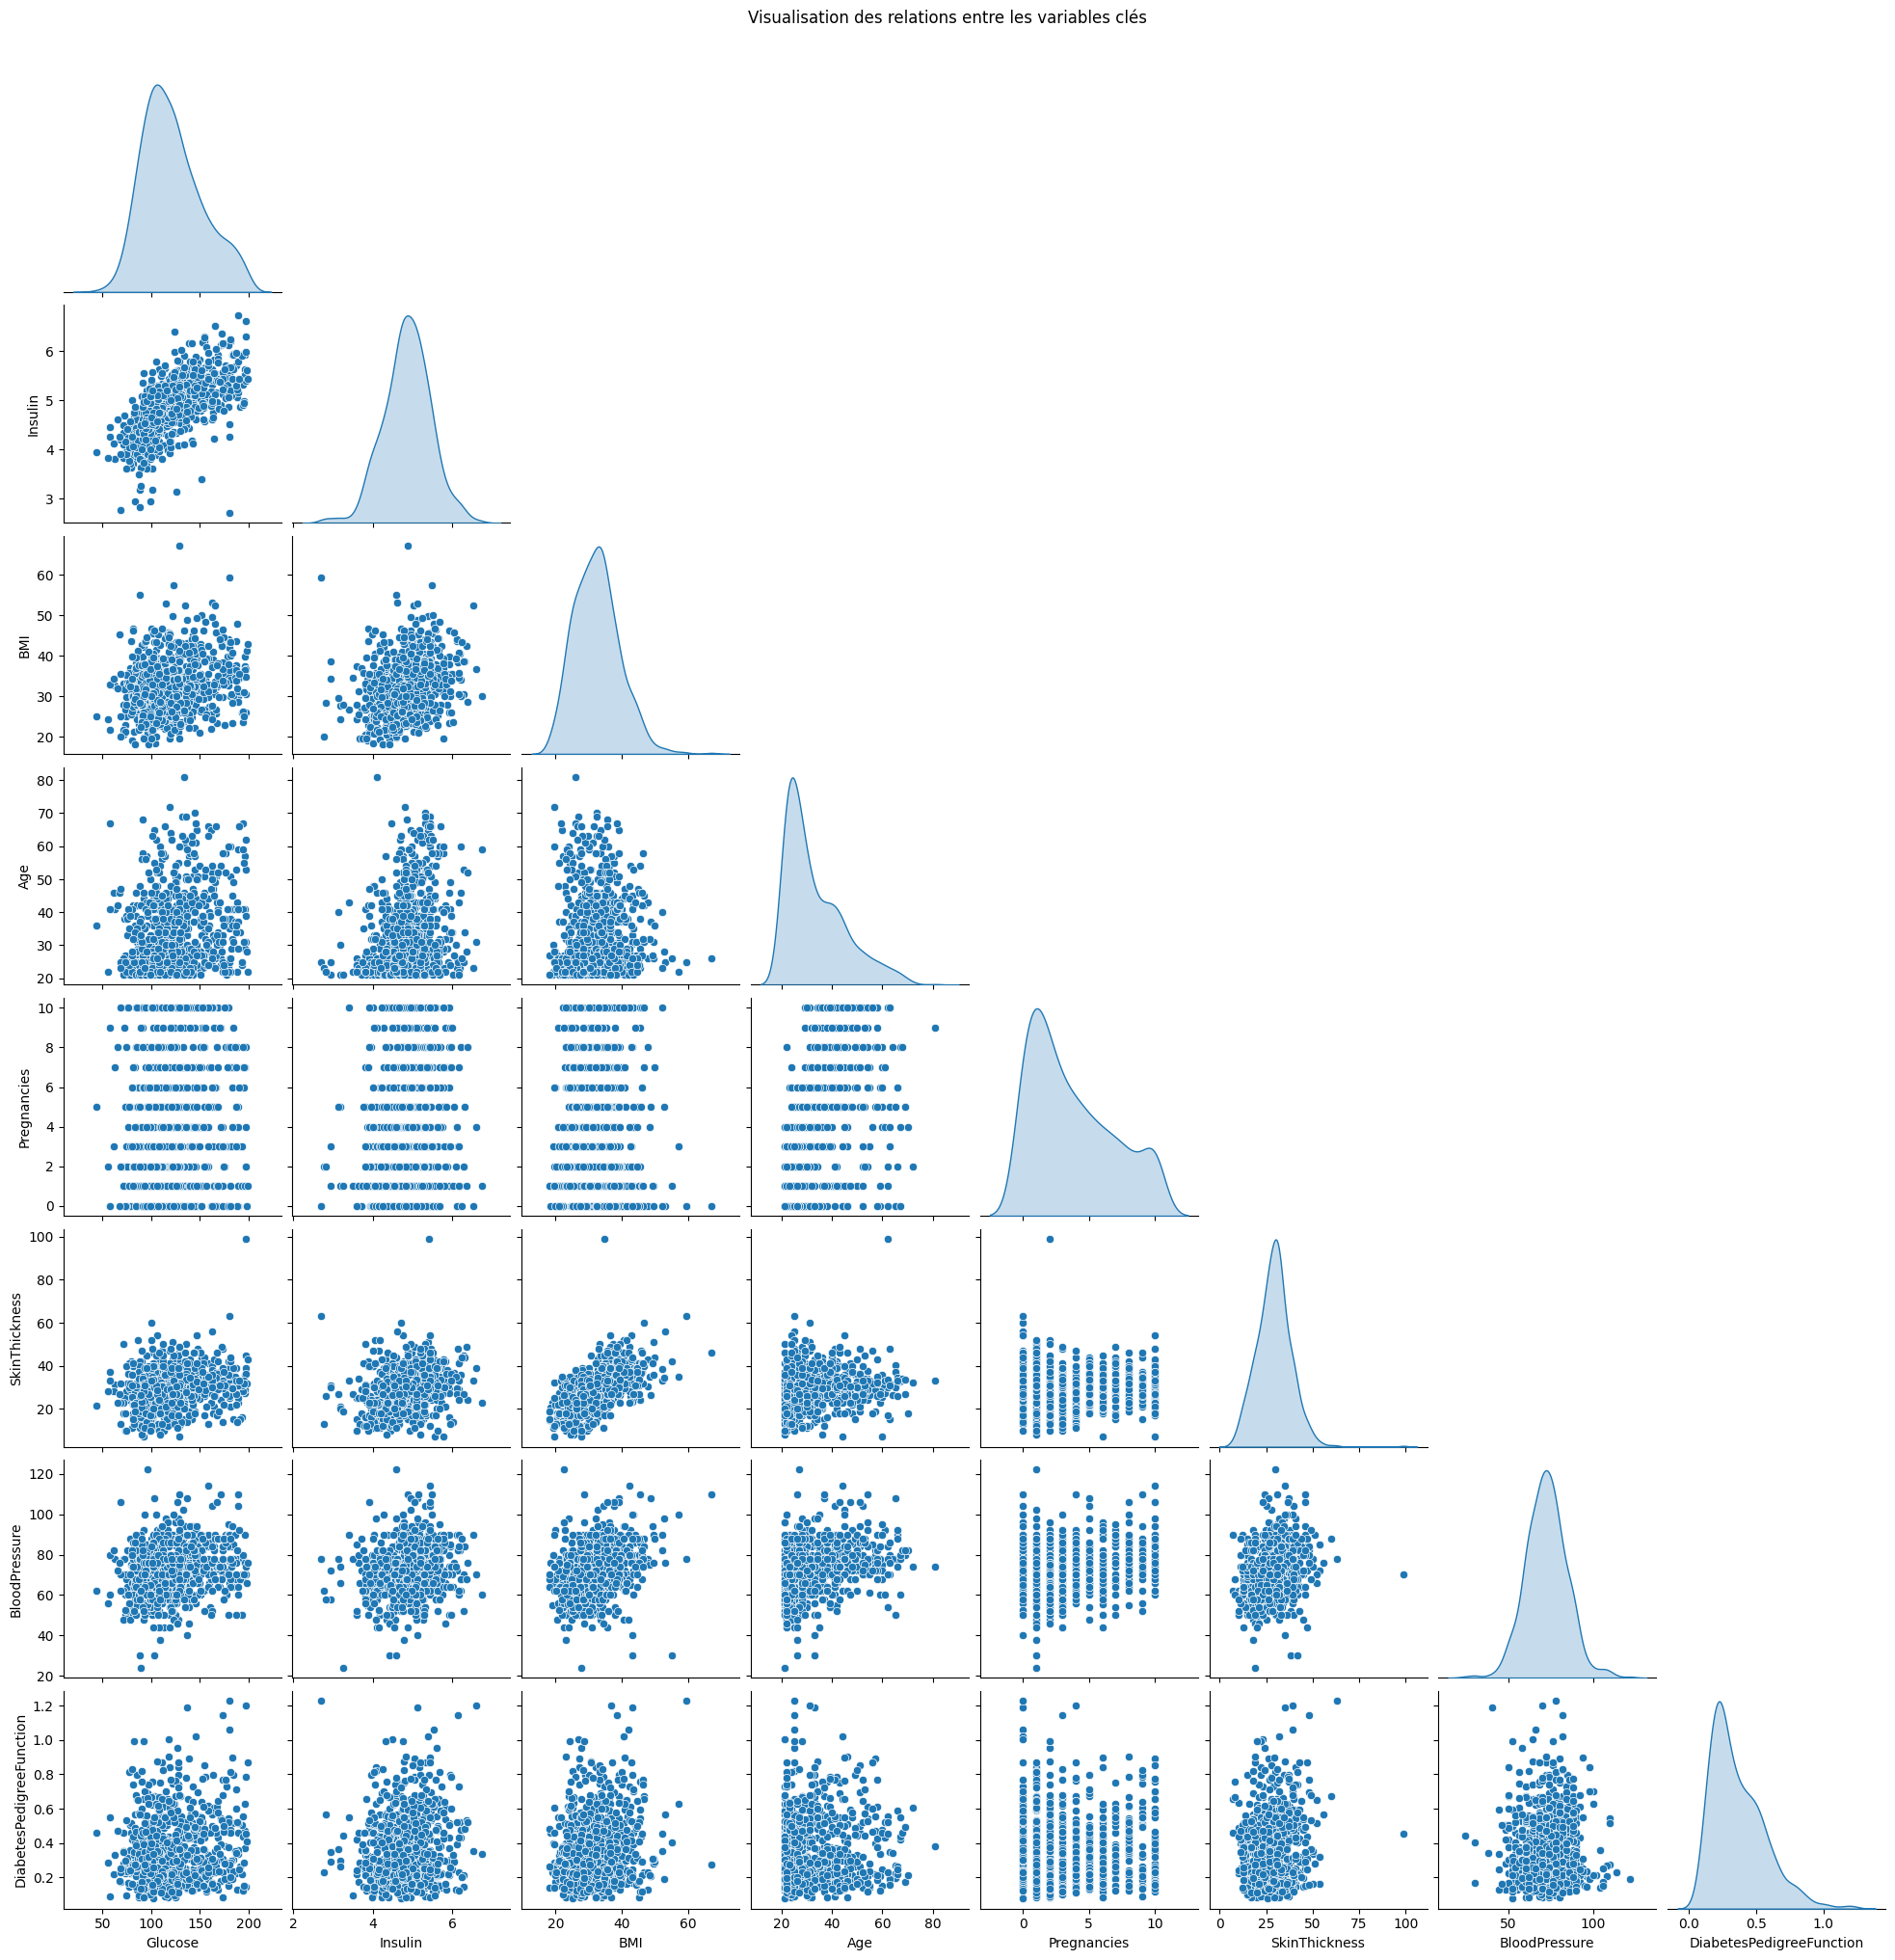

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables les plus pertinentes
vars_selected = ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction']

# Pairplot
sns.pairplot(dataset_3[vars_selected], diag_kind='kde', corner=True)
plt.suptitle("Visualisation des relations entre les variables clés", y=1.02)
plt.show()


*  Variables conservées :

In [88]:
X = dataset_3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
print("Colonnes : ",X.columns)
print("Shape : ",X.shape)


Colonnes :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'DiabetesPedigreeFunction'],
      dtype='object')
Shape :  (768, 8)


### 7️⃣ Appliquer la technique appropriée pour normaliser ou standardiser les échelles des variables numériques.

In [89]:
def standard_data(data):
    standar_scaler = StandardScaler()
    
    standard_dataset = standar_scaler.fit_transform(data)
    
    df_standard = pd.DataFrame(standard_dataset, columns=X.columns)
    # X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    
    return df_standard

In [90]:
dataset_4 = standard_data(X)
dataset_4.head(3)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.723226  0.866352      -0.030668       0.632572  0.339742  0.170302   
1    -0.878382 -1.202079      -0.523065      -0.022166 -0.522583 -0.845411   
2     1.363869  2.015481      -0.687197       0.043308  1.790561 -1.324247   

        Age  DiabetesPedigreeFunction  
0  1.425995                  0.612059  
1 -0.190672                 -0.324994  
2 -0.105584                  0.749586

## 🎯 Entraînement des modèles de clustering avec K-Means

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1️⃣ Déterminer la valeur optimale de k via la méthode du coude et silhouette.

coude pour k = 2 ----> 4799.355761793842
silhouette pour k = 2 ----> 0.199188374083645
coude pour k = 3 ----> 4162.526689766264
silhouette pour k = 3 ----> 0.19293071031340966
coude pour k = 4 ----> 3872.280983565239
silhouette pour k = 4 ----> 0.1493110124684279
coude pour k = 5 ----> 3614.7559768200776
silhouette pour k = 5 ----> 0.13590352166677683
coude pour k = 6 ----> 3404.5044705002915
silhouette pour k = 6 ----> 0.13510452839608886
coude pour k = 7 ----> 3244.924976272071
silhouette pour k = 7 ----> 0.13724366777802477
coude pour k = 8 ----> 3099.1605682716427
silhouette pour k = 8 ----> 0.14378097958277536
coude pour k = 9 ----> 2992.666069173727
silhouette pour k = 9 ----> 0.14028863966971564
coude pour k = 10 ----> 2891.7360282802133
silhouette pour k = 10 ----> 0.1347120004073022


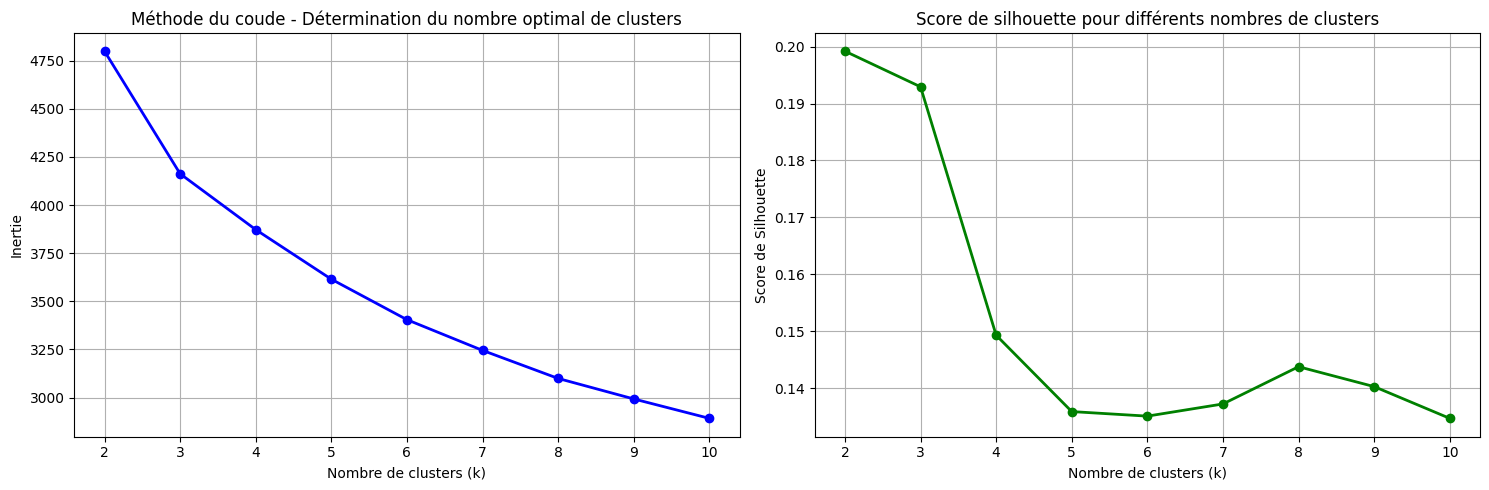

In [92]:

inertias = []
silhouette_scores = []

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    kmeans.fit(dataset_4)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(dataset_4, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"coude pour k = {k} ----> {kmeans.inertia_}")
    print(f"silhouette pour k = {k} ----> {score}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# diagramme de la méthode du coude
ax1.plot(K, inertias, 'o-', linewidth=2, color='blue')
ax1.set_xlabel('Nombre de clusters (k)')
ax1.set_ylabel('Inertie')
ax1.set_title('Méthode du coude - Détermination du nombre optimal de clusters')
ax1.grid(True)

# diagramme du score de silhouette
ax2.plot(K, silhouette_scores, 'o-', linewidth=2, color='green')
ax2.set_xlabel('Nombre de clusters (k)')
ax2.set_ylabel('Score de Silhouette')
ax2.set_title('Score de silhouette pour différents nombres de clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()


⌛ Analyse de vos résultats : 

***** Méthode du coude :
* Coude très net à k = 3 ( la courbe change clairement de pente )

* Après k=3, la décroissance est plus linéaire

***** Score de Silhouette :
* Meilleur score : k = 2 

* Bon score : k = 3

* score optimal : k = 4


In [93]:
# Alors, j'ai choisi le optimal_k = 3 
optimal_k = 2

### 2️⃣ Entraîner un modèle K-Means avec le nombre de clusters choisi.

* Entraîner le model : 

In [94]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=13, n_init=10)
kmeans_final.fit(dataset_4)



KMeans(n_clusters=2, n_init=10, random_state=13)

* Ajouter la colonne "Cluster" à le dataframe "dataset_4"

In [95]:
dataset_4['Cluster'] = kmeans_final.labels_

dataset_4

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.723226  0.866352      -0.030668       0.632572  0.339742  0.170302   
1      -0.878382 -1.202079      -0.523065      -0.022166 -0.522583 -0.845411   
2       1.363869  2.015481      -0.687197       0.043308  1.790561 -1.324247   
3      -0.878382 -1.070750      -0.523065      -0.676903 -0.529659 -0.627758   
4      -1.198703  0.505198      -2.656784       0.632572  0.440337  1.548769   
..           ...       ...            ...            ...       ...       ...   
763     2.004512 -0.676763       0.297597       2.051171  0.555854  0.068731   
764    -0.558060  0.012714      -0.194800      -0.240412 -0.323065  0.634628   
765     0.402904 -0.020118      -0.030668      -0.676903 -0.237474 -0.903452   
766    -0.878382  0.144043      -1.015461       0.130607 -0.051430 -0.337554   
767    -0.878382 -0.939421      -0.194800       0.196080 -0.561872 -0.294024   

          Age  DiabetesPedigreeFunction  Cluster  
0    1.425995                  0.612059        1  
1   -0.190672                 -0.324994        0  
2   -0.105584                  0.749586        1  
3   -1.041549                 -1.063014        0  
4   -0.020496                  4.158488        0  
..        ...                       ...      ...  
763  2.532136                 -1.045766        1  
764 -0.531023                 -0.366205        0  
765 -0.275760                 -0.736877        0  
766  1.170732                 -0.332462        0  
767 -0.871374                 -0.461138        0  

[768 rows x 9 columns]

### 3️⃣ Visualiser la répartition des observations par cluster et interpréter les résultats.

In [96]:
print(f"Le distribution de dataset par rapport a Cluster : ")

dataset_4['Cluster'].value_counts()

Le distribution de dataset par rapport a Cluster : 


Cluster
1    390
0    378
Name: count, dtype: int64

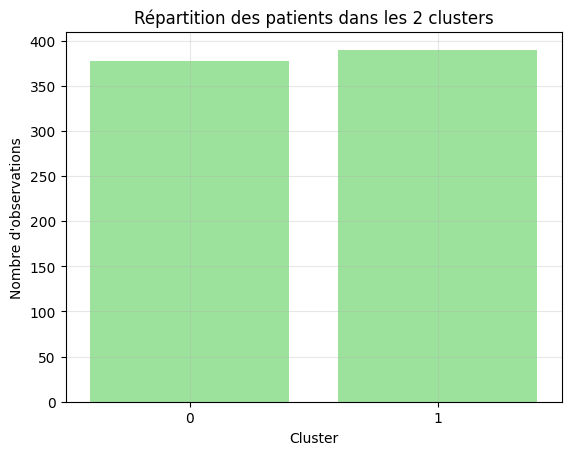

In [97]:
sbn.countplot(data=dataset_4, x='Cluster', color='lightgreen')
plt.title(f'Répartition des patients dans les {optimal_k} clusters')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3)
plt.show()

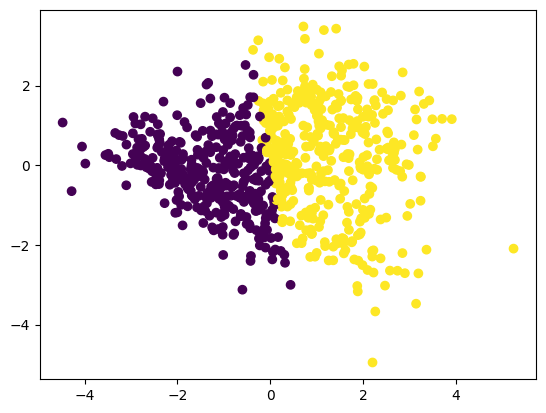

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_4.drop('Cluster', axis=1))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=dataset_4['Cluster'])

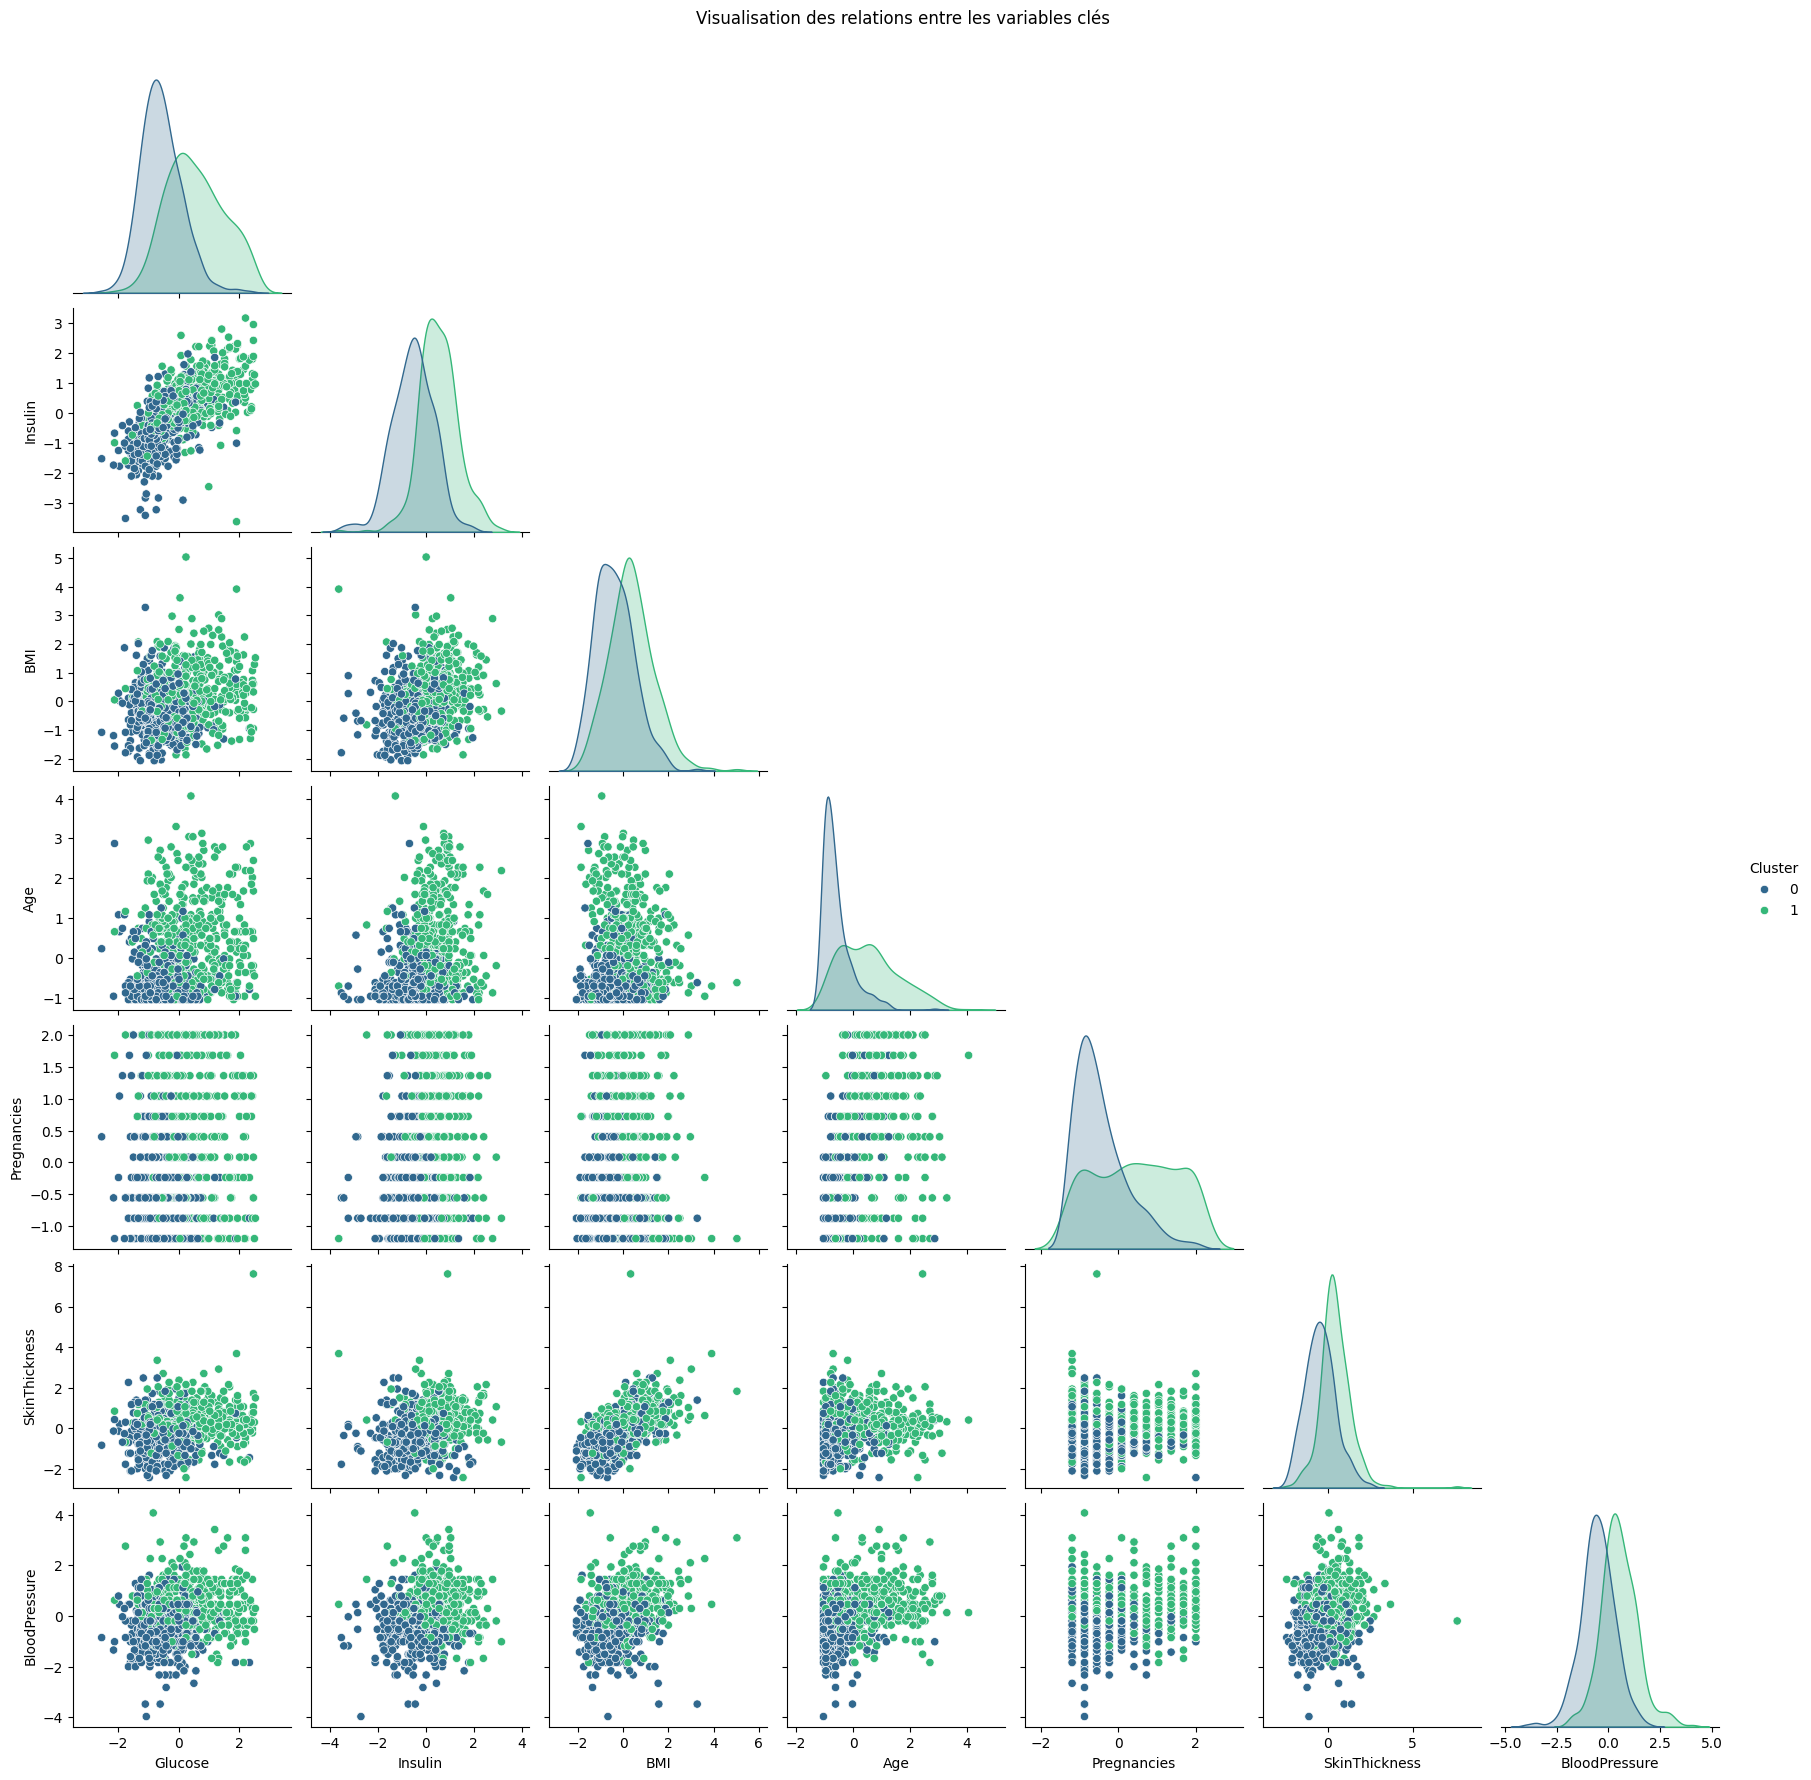

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables les plus pertinentes
vars_selected = ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'BloodPressure', 'Cluster']

# Pairplot 
sns.pairplot(dataset_4[vars_selected], diag_kind='kde', hue='Cluster', corner=True, palette='viridis')
plt.suptitle("Visualisation des relations entre les variables clés", y=1.02)
plt.show()

In [100]:
Clusters = sorted(dataset_4['Cluster'].unique())

Clusters

[np.int32(0), np.int32(1)]

In [101]:
for cluster in Clusters:
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster} - {len(dataset_4[dataset_4['Cluster'] == cluster])} patients")
    print(f"{'='*50}")
    cluster_data = dataset_4[dataset_4['Cluster'] == cluster]
    print(cluster_data.describe())


CLUSTER 0 - 378 patients
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   378.000000  378.000000     378.000000     378.000000  378.000000   
mean     -0.459760   -0.573663      -0.530055      -0.442664   -0.548191   
std       0.672641    0.680540       0.827979       0.893243    0.862739   
min      -1.198703   -2.548201      -3.969842      -2.422871   -3.529273   
25%      -0.878382   -1.037918      -1.015461      -1.113395   -1.111433   
50%      -0.558060   -0.657064      -0.523065      -0.458657   -0.519061   
75%      -0.237739   -0.184280      -0.030668       0.086957    0.017202   
max       2.004512    2.343803       1.938919       2.487662    1.957224   

              BMI         Age  DiabetesPedigreeFunction  Cluster  
count  378.000000  378.000000                378.000000    378.0  
mean    -0.383572   -0.580095                 -0.070180      0.0  
std      0.854991    0.522062                  0.945525      0.0  
min     -2.064266   -

## 🎯 Analyse des clusters : 

### 1️⃣ Calculer les moyennes des variables dans chaque groupe.

In [102]:
dataset_3['Cluster'] = dataset_4['Cluster']

In [103]:
# 1. Calculer les moyennes des caractéristiques par cluster
moyennes_par_cluster = dataset_3.groupby("Cluster").mean()
print(f"\nMoyennes par cluster :")
pd.DataFrame(moyennes_par_cluster)


Moyennes par cluster :


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Cluster                                                                      
0        389.748677     2.306878  104.140212      65.914815      25.146561   
1        377.443590     5.133333  138.547692      78.633846      33.134872   

          Insulin        BMI  DiabetesPedigreeFunction        Age  
Cluster                                                            
0        4.542872  29.782857                  0.351395  26.423280  
1        5.183930  34.988462                  0.378811  39.848718

### 2️⃣ Compter le nombre d’observations par groupe.

In [104]:
# 2. Compter le nombre d'observations par cluster
count_par_cluster = dataset_3.groupby("Cluster").size()

print(f"\nNombre d'observations par cluster :")
print(count_par_cluster)




Nombre d'observations par cluster :
Cluster
0    378
1    390
dtype: int64


### 3️⃣ Le cluster dont les moyennes des variables Glucose (>126), BMI (>30) et Diabetes Pedigree Function (>0,5) dépassent les seuils critiques peut être interprété comme à haut risque de diabète.  &  Ajouter une colonne risk_category basée sur le numero de cluster (ex. : si 1 => risque élevé et 0 => faible).

In [105]:


print("dataset_4.columns : ", dataset_4.columns)
print("dataset_4.shape", dataset_4.shape)
print("dataset_4.head", dataset_4.head(2))
print("dataset_3.columns : ", dataset_3.columns)
print("dataset_3.shape", dataset_3.shape)
print("dataset_3.head", dataset_3.head(2))

dataset_4.columns :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'DiabetesPedigreeFunction', 'Cluster'],
      dtype='object')
dataset_4.shape (768, 9)
dataset_4.head    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.723226  0.866352      -0.030668       0.632572  0.339742  0.170302   
1    -0.878382 -1.202079      -0.523065      -0.022166 -0.522583 -0.845411   

        Age  DiabetesPedigreeFunction  Cluster  
0  1.425995                  0.612059        1  
1 -0.190672                 -0.324994        0  
dataset_3.columns :  Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Cluster'],
      dtype='object')
dataset_3.shape (768, 10)
dataset_3.head    Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin  \
0         0.0          6.0    148.0           72.0           35.0  5.0701

In [106]:
dataset_3.head(10)

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin  \
0         0.0          6.0    148.0           72.0           35.0  5.070161   
1         1.0          1.0     85.0           66.0           29.0  4.558079   
2         2.0          8.0    183.0           64.0           29.6  5.931715   
3         3.0          1.0     89.0           66.0           23.0  4.553877   
4         4.0          0.0    137.0           40.0           35.0  5.129899   
5         5.0          5.0    116.0           74.0           35.8  5.043425   
6         6.0          3.0     78.0           50.0           32.0  4.488636   
7         7.0         10.0    115.0           78.8           38.2  5.029130   
8         8.0          2.0    197.0           70.0           45.0  6.298949   
9         9.0          8.0    125.0           96.0           34.2  5.125154   

     BMI  DiabetesPedigreeFunction   Age  Cluster  
0  33.60                  0.486738  50.0        1  
1  26.60                  0.300845  31.0        0  
2  23.30                  0.514021  32.0        1  
3  28.10                  0.154436  21.0        0  
4  43.10                  1.190279  33.0        0  
5  25.60                  0.183155  30.0        1  
6  31.00                  0.221542  26.0        0  
7  35.30                  0.125751  29.0        1  
8  30.50                  0.146694  53.0        1  
9  36.24                  0.208639  54.0        1

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


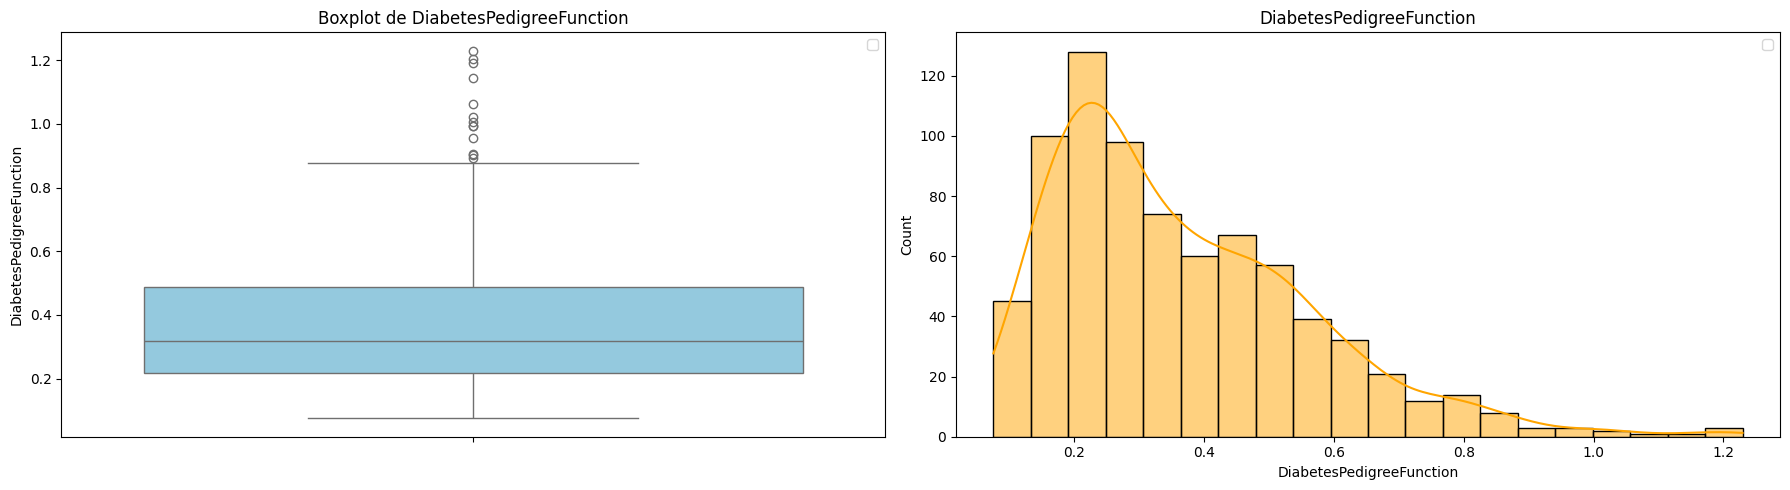

In [107]:
visualization(dataset_3, 'DiabetesPedigreeFunction')

In [108]:
dataset_3['DiabetesPedigreeFunction'] = np.expm1(dataset_3['DiabetesPedigreeFunction'])
# dataset_3['Glucose'] = np.expm1(dataset_3['Glucose'])

In [109]:
dataset_3.head(10)


Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin  \
0         0.0          6.0    148.0           72.0           35.0  5.070161   
1         1.0          1.0     85.0           66.0           29.0  4.558079   
2         2.0          8.0    183.0           64.0           29.6  5.931715   
3         3.0          1.0     89.0           66.0           23.0  4.553877   
4         4.0          0.0    137.0           40.0           35.0  5.129899   
5         5.0          5.0    116.0           74.0           35.8  5.043425   
6         6.0          3.0     78.0           50.0           32.0  4.488636   
7         7.0         10.0    115.0           78.8           38.2  5.029130   
8         8.0          2.0    197.0           70.0           45.0  6.298949   
9         9.0          8.0    125.0           96.0           34.2  5.125154   

     BMI  DiabetesPedigreeFunction   Age  Cluster  
0  33.60                     0.627  50.0        1  
1  26.60                     0.351  31.0        0  
2  23.30                     0.672  32.0        1  
3  28.10                     0.167  21.0        0  
4  43.10                     2.288  33.0        0  
5  25.60                     0.201  30.0        1  
6  31.00                     0.248  26.0        0  
7  35.30                     0.134  29.0        1  
8  30.50                     0.158  53.0        1  
9  36.24                     0.232  54.0        1

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


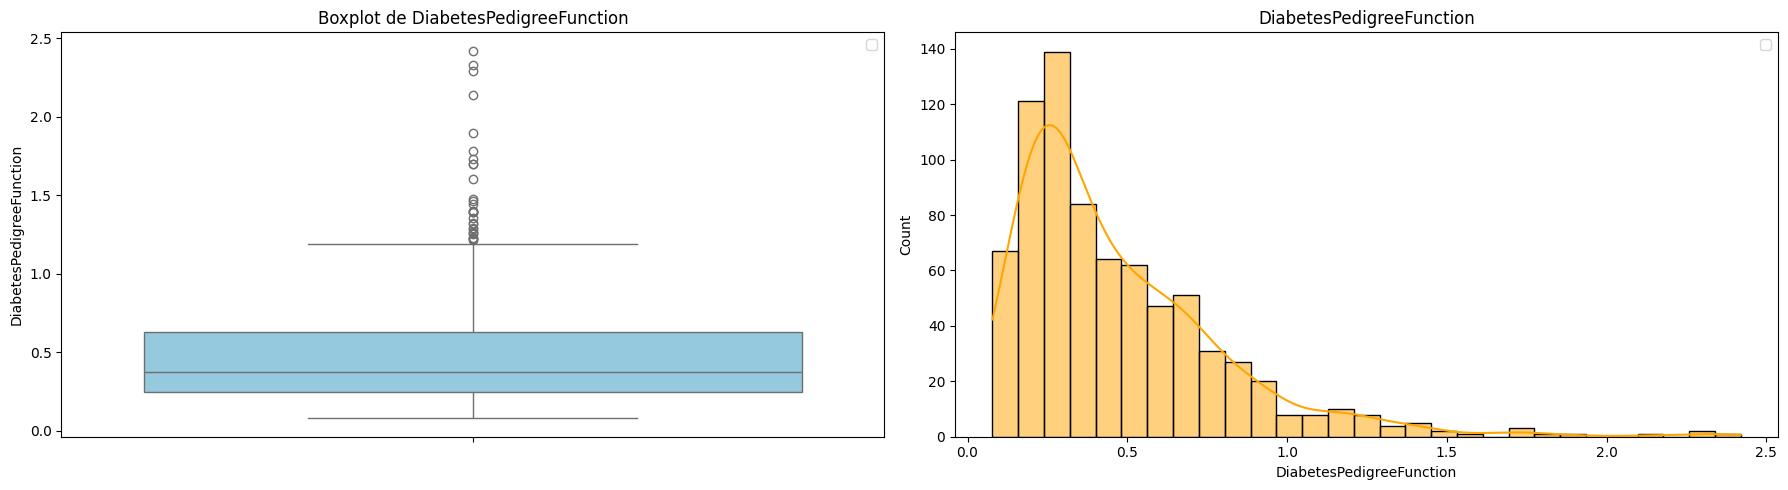

In [110]:
visualization(dataset_3, 'DiabetesPedigreeFunction')

In [111]:
def analyser_clusters(data, col="Cluster"):
    # moyenne
    print("************************************ Moyenne *****************************************************")
    moyennes_par_cluster = data.groupby(col).mean()
    print("Moyennes colonnes par clusters : \n", moyennes_par_cluster)
    
    # nombre d'observation 
    print("************************************ observation *****************************************************")
    count_par_cluster = data.groupby(col).size()
    print("nombre d'observation des clusters : \n", count_par_cluster)
    
    # cluster à haut risque
    clusters_haut_risque = []
    
    for cluster in moyennes_par_cluster.index:
        glucose_ok = moyennes_par_cluster.loc[cluster, 'Glucose'] > 126
        bmi_ok = moyennes_par_cluster.loc[cluster, 'BMI'] > 30
        dpf_ok = moyennes_par_cluster.loc[cluster, 'DiabetesPedigreeFunction'] > 0.49
        print("\n ", cluster)
        print(glucose_ok)
        print(bmi_ok)
        print(dpf_ok, moyennes_par_cluster.loc[cluster, 'DiabetesPedigreeFunction'])
        
        if glucose_ok and bmi_ok and dpf_ok:
            clusters_haut_risque.append(cluster)
            
    data['risk_category'] = data[col].apply(
        lambda x: 1 if x in clusters_haut_risque else 0
    )
    
    print(f"\n=== RÉSULTATS FINAUX ===")
    print(f"Clusters à haut risque: {clusters_haut_risque}")
    print(f"Répartition des catégories de risque:")
    print(data['risk_category'].value_counts())
    
    return data, moyennes_par_cluster, count_par_cluster
    
    
# ! **************************************************************************************************************************
dataset_5, moyennes_par_cluster, count_par_cluster = analyser_clusters(dataset_3, 'Cluster')

************************************ Moyenne *****************************************************
Moyennes colonnes par clusters : 
          Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Cluster                                                                      
0        389.748677     2.306878  104.140212      65.914815      25.146561   
1        377.443590     5.133333  138.547692      78.633846      33.134872   

          Insulin        BMI  DiabetesPedigreeFunction        Age  
Cluster                                                            
0        4.542872  29.782857                  0.448042  26.423280  
1        5.183930  34.988462                  0.494977  39.848718  
************************************ observation *****************************************************
nombre d'observation des clusters : 
 Cluster
0    378
1    390
dtype: int64

  0
False
False
False 0.448042328042328

  1
True
True
True 0.4949769230769231

=== RÉSULTATS FINAUX

In [112]:
dataset_5['Cluster'].value_counts()

Cluster
1    390
0    378
Name: count, dtype: int64

In [113]:
dataset_5['risk_category'].unique()

array([1, 0])

In [114]:
dataset_5['Cluster'].unique()

array([1, 0], dtype=int32)

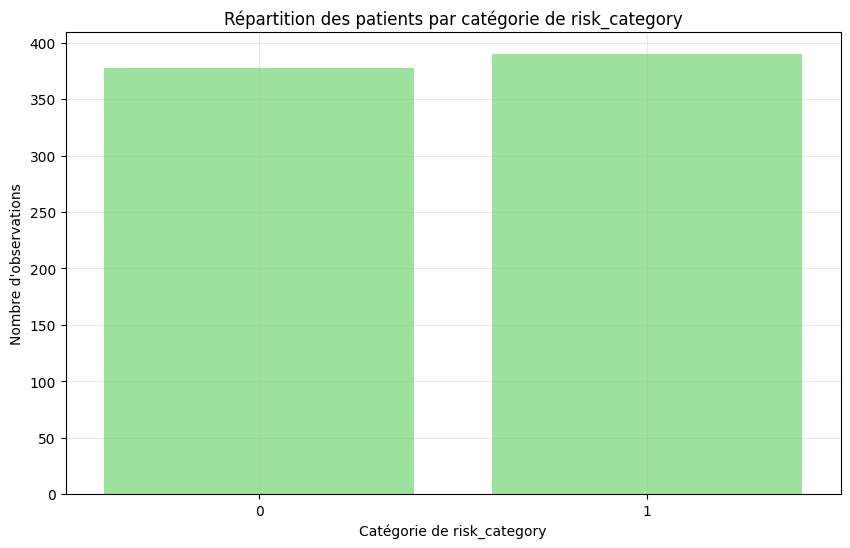

Répartition des risques:
risk_category
1    390
0    378
Name: count, dtype: int64


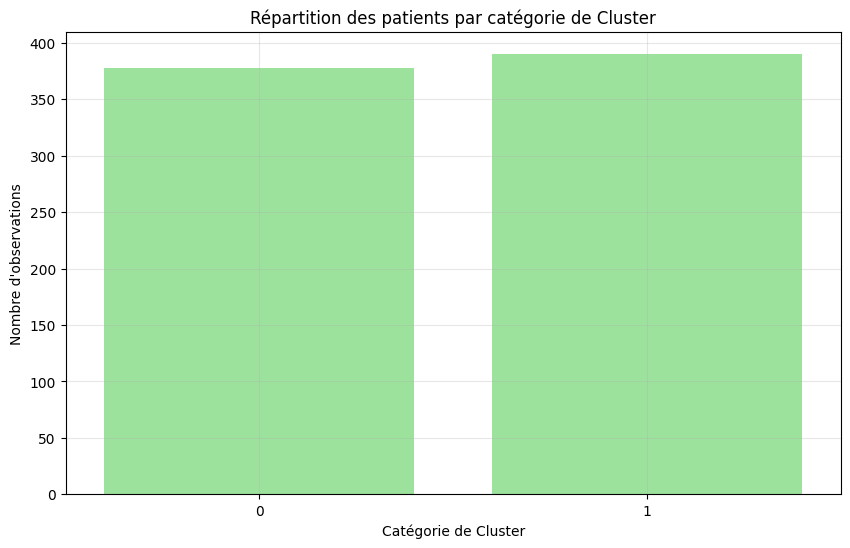

Répartition des risques:
Cluster
1    390
0    378
Name: count, dtype: int64


In [115]:
def visualiser_risk_category(dataset, col):
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=col, color='lightgreen')
    plt.title(f'Répartition des patients par catégorie de {col}')
    plt.xlabel(f'Catégorie de {col}')
    plt.ylabel("Nombre d'observations")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("Répartition des risques:")
    print(dataset[col].value_counts())

visualiser_risk_category(dataset_5, col="risk_category")
visualiser_risk_category(dataset_5, col="Cluster")

In [116]:
dataset_5.describe()

c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the 

Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.742188  121.612760      72.373698      29.203125   
std    221.846794     3.123898   30.477714      12.193237       9.169946   
min      0.000000     0.000000   44.000000      24.000000       7.000000   
25%    191.750000     1.000000   99.000000      64.000000      23.000000   
50%    383.500000     3.000000  117.000000      72.000000      29.400000   
75%    575.250000     6.000000  140.250000      80.000000      34.400000   
max    767.000000    10.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  \
count  768.000000  768.000000                768.000000  768.000000   
mean     4.868409   32.426328                  0.471876   33.240885   
std      0.594226    6.896203                  0.331329   11.760232   
min      2.708050   18.200000                  0.078000   21.000000   
25%      4.510860   27.475000                  0.243750   24.000000   
50%      4.875197   32.290000                  0.372500   29.000000   
75%      5.252273   36.600000                  0.626250   41.000000   
max      6.741701   67.100000                  2.420000   81.000000   

          Cluster  risk_category  
count  768.000000     768.000000  
mean     0.507812       0.507812  
std      0.500265       0.500265  
min      0.000000       0.000000  
25%      0.000000       0.000000  
50%      1.000000       1.000000  
75%      1.000000       1.000000  
max      1.000000       1.000000

## 🎯 Classification supervisée et évaluation des modèles

### 1️⃣ Définir la variable cible y à partir de la colonne Cluster.

In [117]:
from sklearn.model_selection import train_test_split


def diviser_test_train(data, target="risk_category"):
    X = data.drop(target, axis=1)
    y = data[target]
    
    print("\n\nTarget y : \n",y.shape, "\n", y.head())
    print("\n\nFeature X : \n",X.shape,  "\n", X.head() )
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y, 
        test_size=0.2,
        random_state=42,
        shuffle=True,
        stratify=None
    )
    
    print(f"X_train: {X_train.shape} ({X_train.shape[0]/len(data)*100:.1f}%)")
    print(f"X_test: {X_test.shape} ({X_test.shape[0]/len(data)*100:.1f}%)")
    print(f"y_train: {y_train.shape} ({y_train.shape[0]/len(data)*100:.1f}%)")
    print(f"y_test: {y_test.shape} ({y_test.shape[0]/len(data)*100:.1f}%)")
    
    return X_train, X_test, y_train, y_test, X, y

print(dataset_5.columns)
dataset_5 = dataset_5.drop('Unnamed: 0', axis=1)
data_entrainement = dataset_5.drop('Cluster', axis=1)
print(data_entrainement.columns)
    
X_train, X_test, y_train, y_test, X, y = diviser_test_train(data_entrainement)

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Cluster', 'risk_category'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'risk_category'],
      dtype='object')


Target y : 
 (768,) 
 0    1
1    0
2    1
3    0
4    0
Name: risk_category, dtype: int64


Feature X : 
 (768, 8) 
    Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0          6.0    148.0           72.0           35.0  5.070161  33.6   
1          1.0     85.0           66.0           29.0  4.558079  26.6   
2          8.0    183.0           64.0           29.6  5.931715  23.3   
3          1.0     89.0           66.0           23.0  4.553877  28.1   
4          0.0    137.0           40.0           35.0  5.129899  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1  

In [118]:
X_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.651466  121.753420      72.167427      28.817264    4.864114   
std       3.085358   30.155315      12.192292       8.779594    0.587560   
min       0.000000   44.000000      24.000000       8.000000    2.708050   
25%       1.000000  100.000000      64.000000      23.000000    4.521789   
50%       3.000000  118.000000      72.000000      29.000000    4.875197   
75%       6.000000  139.000000      80.000000      34.000000    5.250701   
max      10.000000  199.000000     122.000000      63.000000    6.741701   

              BMI  DiabetesPedigreeFunction         Age  
count  614.000000                614.000000  614.000000  
mean    32.317622                  0.469168   32.907166  
std      6.953570                  0.336847   11.503437  
min     18.200000                  0.078000   21.000000  
25%     27.225000                  0.241500   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.375000                  0.613750   40.000000  
max     67.100000                  2.420000   81.000000

In [119]:
# Standarisation de dataset

standar_scaler = StandardScaler()
X_train_scaled = standar_scaler.fit_transform(X_train)
X_test_scaled = standar_scaler.transform(X_test)

print("**************** StandardScaler : *****************")
print("\nX_train_scaled : \n",X_train_scaled)
print("\nX_test_scaled : \n",X_test_scaled)

**************** StandardScaler : *****************

X_train_scaled : 
 [[-0.53569543 -1.25298647 -0.91668832 ... -1.0906341  -0.49073479
  -1.03594038]
 [ 1.73493472 -0.32370322  0.80711567 ... -0.59264226  2.41502991
   1.48710085]
 [-0.86007117  0.57239135 -2.14797689 ... -0.52067813  0.54916055
  -0.94893896]
 ...
 [ 2.05931046 -0.68877878  1.13545929 ...  1.91170977  1.981245
   0.44308379]
 [-1.18444691  0.63876873  0.75786413 ...  1.45113928 -0.78487662
  -0.33992901]
 [-1.18444691  0.10774972  1.95631833 ... -1.41303345 -0.61552223
  -1.03594038]]

X_test_scaled : 
 [[ 0.76180751 -0.78834485 -1.16294604 ...  0.24214175 -0.11637247
   0.87809089]
 [-0.53569543 -0.32370322  0.23251434 ...  0.48681982 -0.954231
  -1.03594038]
 [-0.53569543 -0.45645797 -0.67043061 ... -0.21842874 -0.9245197
  -1.03594038]
 ...
 [ 1.41055898 -0.88791091 -0.01374337 ...  0.64514092  0.04703966
   2.0961108 ]
 [-0.53569543  0.80471217 -0.17791518 ... -0.62142792 -0.39268751
  -0.33992901]
 [ 1.4105589

In [120]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(614, 8)
(154, 8)


### 2️⃣ Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage ou sous-échantillonnage (RandomOverSampler, UnderSampler via imblearn).

In [121]:

# Option A : Sur-échantillonnage (créer des copies de la classe minoritaire)
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
# X_test_resampled, y_test_resampled = oversampler.fit_resample(X_test_scaled, y_test)

# # Option B : Sous-échantillonnage (supprimer aléatoirement des exemples de la classe majoritaire)
# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


In [122]:
pd.DataFrame(X_train_resampled)

0         1         2         3         4         5         6  \
0   -0.535695 -1.252986 -0.916688 -1.141901 -1.299863 -1.090634 -0.490735   
1    1.734935 -0.323703  0.807116 -0.549136 -0.144767 -0.592642  2.415030   
2   -0.860071  0.572391 -2.147977 -1.119103 -0.738053 -0.520678  0.549161   
3   -1.184447  1.302542 -1.819633  0.157623  0.535349 -1.499390 -0.639291   
4    0.761808  0.406448  0.642944  0.932778  1.792067  1.998067 -0.686829   
..        ...       ...       ...       ...       ...       ...       ...   
611  2.059310 -0.688779  1.135459  0.932778 -0.107952  1.911710  1.981245   
612 -1.184447  0.638769  0.757864  0.773187  0.655810  1.451139 -0.784877   
613 -1.184447  0.107750  1.956318 -0.252753  0.482695 -1.413033 -0.615522   
614 -0.211320 -0.224137 -0.506259  1.160764  0.144182  0.832248 -0.948289   
615 -0.860071  1.966316 -0.670431  0.134824  0.569569  0.256535 -0.419428   

            7  
0   -1.035940  
1    1.487101  
2   -0.948939  
3    2.792122  
4    1.139095  
..        ...  
611  0.443084  
612 -0.339929  
613 -1.035940  
614 -0.426930  
615  0.443084  

[616 rows x 8 columns]

In [123]:
t = pd.DataFrame(y_test)
t['risk_category'].value_counts()

risk_category
1    84
0    70
Name: count, dtype: int64

In [124]:
t = pd.DataFrame(y_train_resampled)
t['risk_category'].value_counts()

risk_category
0    308
1    308
Name: count, dtype: int64

In [125]:
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6  \
0   -0.535695 -1.252986 -0.916688 -1.141901 -1.299863 -1.090634 -0.490735   
1    1.734935 -0.323703  0.807116 -0.549136 -0.144767 -0.592642  2.415030   
2   -0.860071  0.572391 -2.147977 -1.119103 -0.738053 -0.520678  0.549161   
3   -1.184447  1.302542 -1.819633  0.157623  0.535349 -1.499390 -0.639291   
4    0.761808  0.406448  0.642944  0.932778  1.792067  1.998067 -0.686829   
..        ...       ...       ...       ...       ...       ...       ...   
609  0.437432  0.572391 -0.670431  0.704791  0.144182 -0.535071 -0.172824   
610 -0.860071 -0.854722  4.090552  0.112025 -0.461633 -1.427426 -0.778934   
611  2.059310 -0.688779  1.135459  0.932778 -0.107952  1.911710  1.981245   
612 -1.184447  0.638769  0.757864  0.773187  0.655810  1.451139 -0.784877   
613 -1.184447  0.107750  1.956318 -0.252753  0.482695 -1.413033 -0.615522   

            7  
0   -1.035940  
1    1.487101  
2   -0.948939  
3    2.792122  
4    1.139095  
..        ...  
609 -0.600933  
610 -0.513932  
611  0.443084  
612 -0.339929  
613 -1.035940  

[614 rows x 8 columns]

In [126]:
dataset_5

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0            6.0    148.0           72.0           35.0  5.070161  33.6   
1            1.0     85.0           66.0           29.0  4.558079  26.6   
2            8.0    183.0           64.0           29.6  5.931715  23.3   
3            1.0     89.0           66.0           23.0  4.553877  28.1   
4            0.0    137.0           40.0           35.0  5.129899  43.1   
..           ...      ...            ...            ...       ...   ...   
763         10.0    101.0           76.0           48.0  5.198497  32.9   
764          2.0    122.0           70.0           27.0  4.676560  36.8   
765          5.0    121.0           72.0           23.0  4.727388  26.2   
766          1.0    126.0           60.0           30.4  4.837868  30.1   
767          1.0     93.0           70.0           31.0  4.534748  30.4   

     DiabetesPedigreeFunction   Age  Cluster  risk_category  
0                       0.627  50.0        1              1  
1                       0.351  31.0        0              0  
2                       0.672  32.0        1              1  
3                       0.167  21.0        0              0  
4                       2.288  33.0        0              0  
..                        ...   ...      ...            ...  
763                     0.171  63.0        1              1  
764                     0.340  27.0        0              0  
765                     0.245  30.0        0              0  
766                     0.349  47.0        0              0  
767                     0.315  23.0        0              0  

[768 rows x 10 columns]

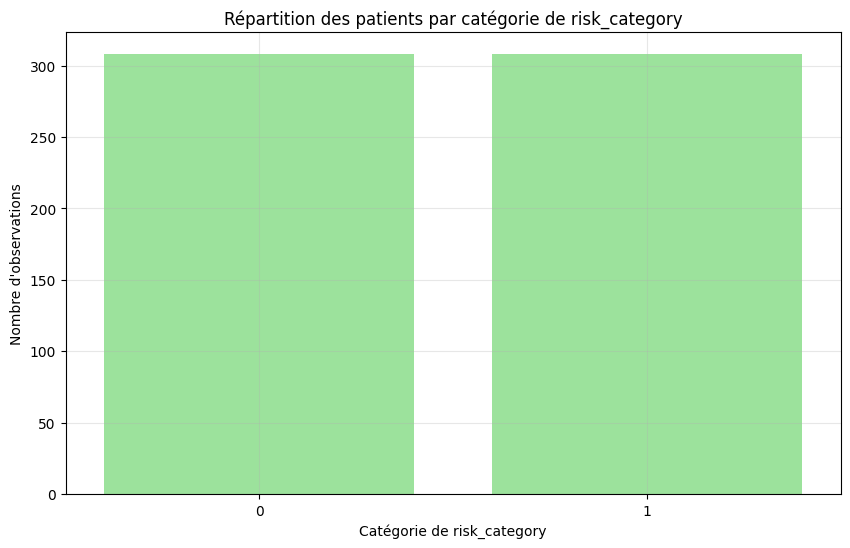

Répartition des risques:
risk_category
0    308
1    308
Name: count, dtype: int64


In [127]:
visualiser_risk_category(pd.DataFrame(y_train_resampled), col="risk_category")

### 3️⃣ Tester les algorithmes suivants : Random Forest, SVM, Gradient Boosting, Decision Tree, Régression Logistique , XGB.

In [128]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


In [129]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def tester_modeles_classification(X_train, X_test, y_train, y_test):
    
    modeles = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
    }
    
    resultats_scores = {}
    resultats_modeles = {}
    predictions_modeles = {}
    matrices_confusion = {} 
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, (nom, modele) in enumerate(modeles.items()):
        print(f"\n{nom}" + "="*50)
        
        modele.fit(X_train, y_train)
        y_pred = modele.predict(X_test)
        y_pred_proba = modele.predict_proba(X_test)[:, 1] if hasattr(modele, "predict_proba") else None
        
        # Calcul des métriques
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Validation croisée avec cross validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(modele, X_train, y_train, cv=cv, scoring="f1_weighted")
        
        # matrice de confusion
        cm = confusion_matrix(y_test, y_pred)
        matrices_confusion[nom] = cm
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   xticklabels=['Risque Faible', 'Risque Élevé'],
                   yticklabels=['Risque Faible', 'Risque Élevé'])
        axes[idx].set_title(f'Matrice de Confusion - {nom}\nAccuracy: {accuracy:.3f}')
        axes[idx].set_xlabel('Prédictions')
        axes[idx].set_ylabel('Vérités Terrain')
        
        resultats_scores[nom] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
        }
        
        resultats_modeles[nom] = {
            'modele': modele,
            'predictions': y_pred,
            'predictions_proba': y_pred_proba
        }
        
        predictions_modeles[nom] = y_pred
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        print(f"\nRapport de Classification - {nom}:")
        print(classification_report(y_test, y_pred, 
                                  target_names=['Risque Faible', 'Risque Élevé']))
        
        tn, fp, fn, tp = cm.ravel()
        print(f"Vrais Négatifs (TN): {tn} | Faux Positifs (FP): {fp}")
        print(f"Faux Négatifs (FN): {fn} | Vrais Positifs (TP): {tp}")
        print(f"Taux Faux Positifs: {fp/(fp+tn):.3f} | Taux Faux Négatifs: {fn/(fn+tp):.3f}")
        
        print("="*50)
    
    plt.tight_layout()
    plt.show()
    
    return resultats_scores, resultats_modeles, predictions_modeles, matrices_confusion


RandomForest==================================================
Accuracy: 0.9481
Precision: 0.9482
Recall: 0.9481
F1-Score: 0.9480
CV F1-Score: 0.9399 (+/- 0.0218)

Rapport de Classification - RandomForest:
               precision    recall  f1-score   support

Risque Faible       0.96      0.93      0.94        70
 Risque Élevé       0.94      0.96      0.95        84

     accuracy                           0.95       154
    macro avg       0.95      0.95      0.95       154
 weighted avg       0.95      0.95      0.95       154

Vrais Négatifs (TN): 65 | Faux Positifs (FP): 5
Faux Négatifs (FN): 3 | Vrais Positifs (TP): 81
Taux Faux Positifs: 0.071 | Taux Faux Négatifs: 0.036

SVM==================================================
Accuracy: 0.9805
Precision: 0.9812
Recall: 0.9805
F1-Score: 0.9805
CV F1-Score: 0.9561 (+/- 0.0366)

Rapport de Classification - SVM:
               precision    recall  f1-score   support

Risque Faible       1.00      0.96      0.98        70
 Risque Él

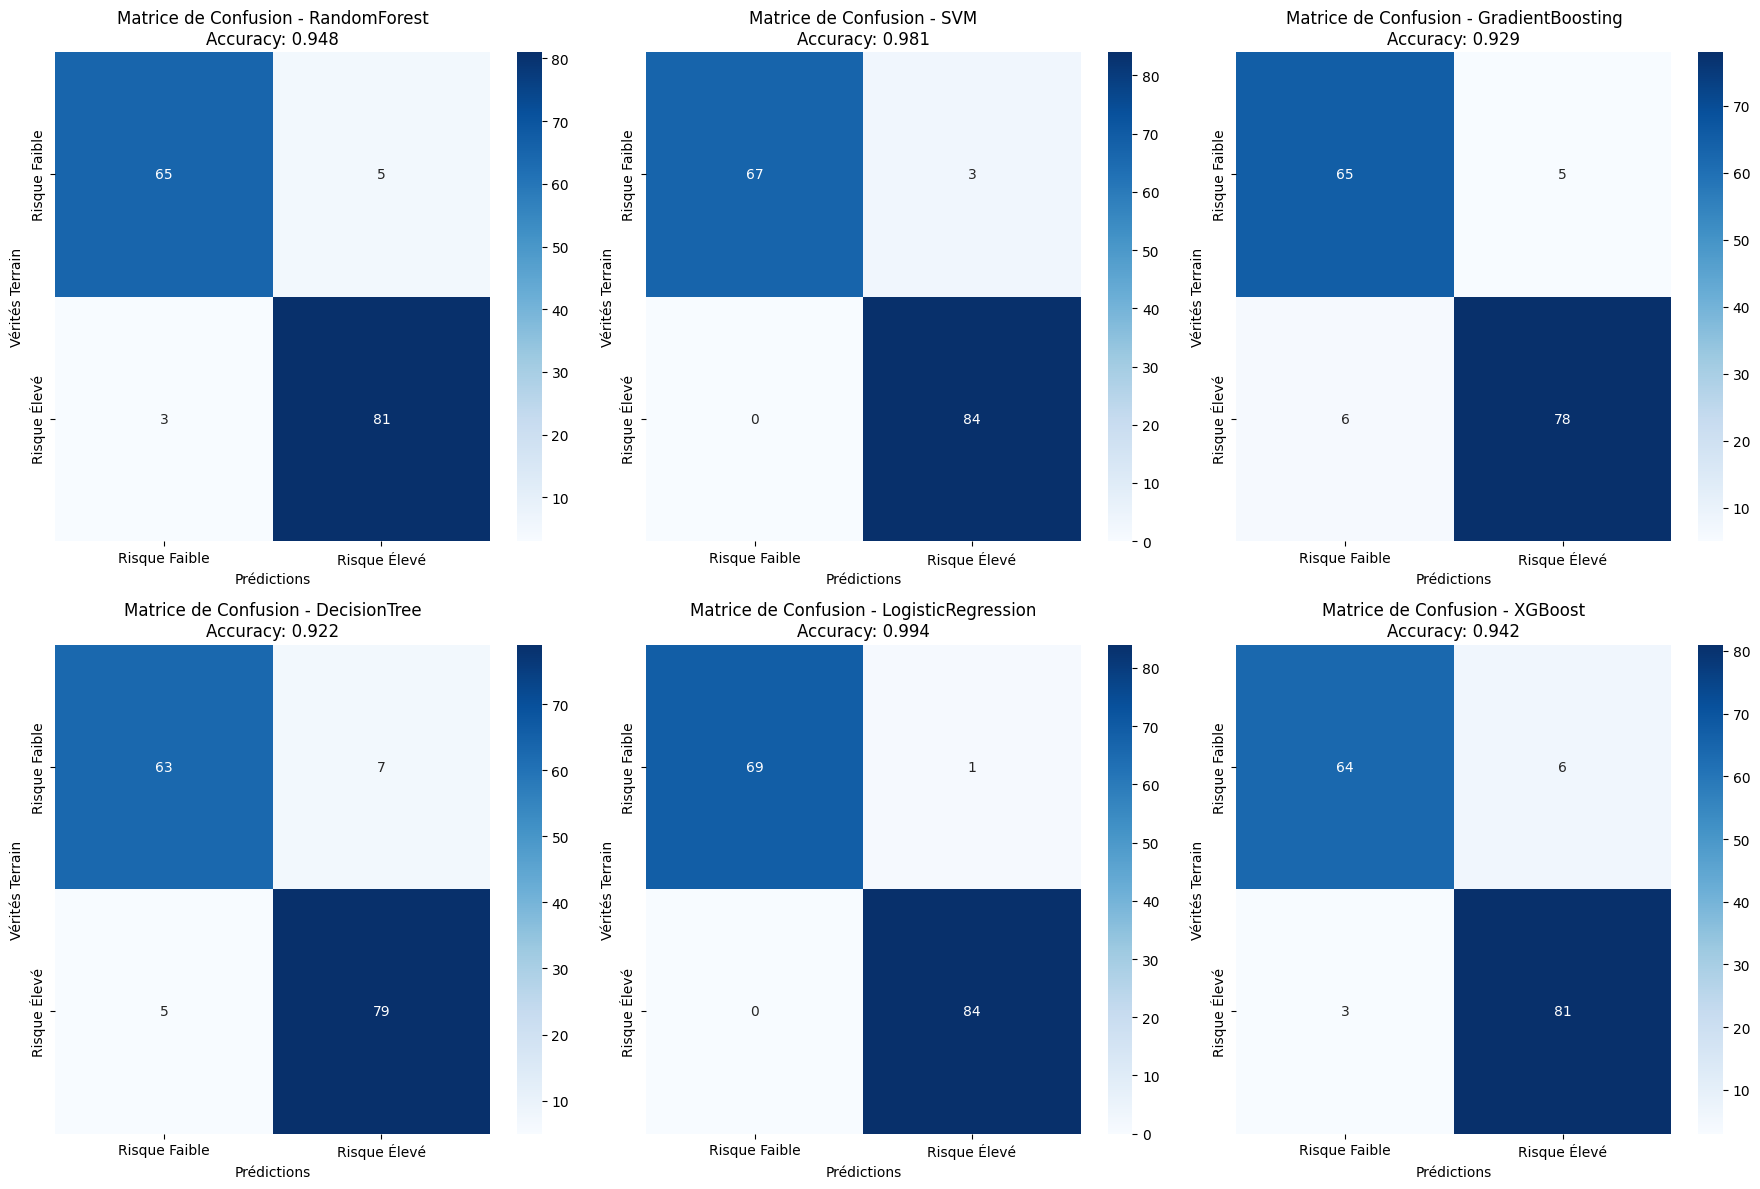

In [130]:

resultats_scores, resultats_modeles, predictions_modeles, matrices_confusion = tester_modeles_classification(
    X_train_resampled, X_test_scaled, y_train_resampled, y_test
)

In [131]:
pd.DataFrame(resultats_scores)

RandomForest       SVM  GradientBoosting  DecisionTree  \
accuracy       0.948052  0.980519          0.928571      0.922078   
precision      0.948234  0.981191          0.928729      0.922180   
recall         0.948052  0.980519          0.928571      0.922078   
f1_score       0.947981  0.980477          0.928611      0.921972   
cv_mean        0.939910  0.956130          0.926907      0.835956   
cv_std         0.010925  0.018287          0.011553      0.031313   

           LogisticRegression   XGBoost  
accuracy             0.993506  0.941558  
precision            0.993583  0.942030  
recall               0.993506  0.941558  
f1_score             0.993502  0.941431  
cv_mean              0.988629  0.931811  
cv_std               0.006512  0.016487

In [132]:
pd.DataFrame(resultats_modeles)

RandomForest  \
modele             (DecisionTreeClassifier(max_features='sqrt', r...   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.59, 0.34, 0.02, 0.65, 0.99, 0.98, 0.0, 0.85...   

                                                                 SVM  \
modele                                          SVC(random_state=42)   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba                                               None   

                                                    GradientBoosting  \
modele             ([DecisionTreeRegressor(criterion='friedman_ms...   
predictions        [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...   
predictions_proba  [0.44862650883909855, 0.5952339850837951, 0.00...   

                                                        DecisionTree  \
modele                       DecisionTreeClassifier(random_state=42)   
predictions        [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...   

                                                  LogisticRegression  \
modele                           LogisticRegression(random_state=42)   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.7920265356628683, 0.07979560058580296, 0.00...   

                                                             XGBoost  
modele             XGBClassifier(base_score=None, booster=None, c...  
predictions        [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...  
predictions_proba  [0.7913354, 0.6589719, 1.7092065e-05, 0.971635...

### 4️⃣ Évaluer la robustesse des modèles sur différentes partitions du jeu de données en utilisant la validation croisée (cross-validation).

##### CLASSEMENT DES MODÈLES :
* Logistic Regression : 99.4% ✅ (MEILLEUR)

* SVM : 97.6% ✅ (EXCELLENT)

* Random Forest & XGBoost : 92.9% ✅ (TRÈS BON)

* Gradient Boosting : 91.1% ✅ (BON)

* Decision Tree : 89.9% ✅ (BON)


### 5️⃣ Utiliser des techniques comme GridSearchCV ou RandomizedSearchCV pour affiner les hyperparamètres des modèles et améliorer leurs performances.

In [133]:
the_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

In [134]:

param_grid = {
    'RandomForest':{
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
        
    },
    'SVM':{
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        # 'gamma': ['scale', 'auto', 0.1, 0.01],
        'degree': [2, 3, 4] 
        
    },
    'GradientBoosting':{
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0]
        
    },
    'DecisionTree':{
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2', None]
        
    },
    'LogisticRegression':{
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
                
    },
    'XGBoost':{
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2]
        
    }

}

In [135]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def optimiser_hyperparametres(X_train, X_test, y_train, y_test, the_models, param_grid, cv=5, scoring='f1_weighted'):
    
    
    print("="*60)
    
    modeles_optimises = {}
    meilleurs_params = {}
    resultats_scores = {}
    resultats_modeles = {}
    predictions_modeles = {}
    matrices_confusion = {}
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, (name, model) in enumerate(the_models.items()):
        print(f"\n🎯 Optimisation {name}" + "="*50)
        
        if name in ['DecisionTree', 'LogisticRegression']:
            # GridSearchCV pour les modèles plus simples
            model_cv = GridSearchCV(
                estimator=model,
                param_grid=param_grid[name],
                cv=cv,
                scoring=scoring,
                n_jobs=-1,
                verbose=1
            )
        else:
            # RandomizedSearchCV pour les modèles complexes
            model_cv = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grid[name],
                n_iter=20,
                cv=cv,
                scoring=scoring,
                n_jobs=-1,
                random_state=42,
                verbose=1
            )
        
        model_cv.fit(X_train, y_train)
        
        meilleur_modele = model_cv.best_estimator_
        y_pred = meilleur_modele.predict(X_test)
        y_pred_proba = meilleur_modele.predict_proba(X_test)[:, 1] if hasattr(meilleur_modele, "predict_proba") else None
        
        # Calcul des métriques
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Validation croisée Cross validatio
        cv_valid = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(meilleur_modele, X_train, y_train, cv=cv_valid, scoring="f1_weighted")
        
        # Matrice de confusion
        cm = confusion_matrix(y_test, y_pred)
        matrices_confusion[name] = cm
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   xticklabels=['Risque Faible', 'Risque Élevé'],
                   yticklabels=['Risque Faible', 'Risque Élevé'])
        axes[idx].set_title(f'Matrice de Confusion - {name} Optimisé\nAccuracy: {accuracy:.3f}')
        axes[idx].set_xlabel('Prédictions')
        axes[idx].set_ylabel('Vérités Terrain')
        
        # Stockage des résultats
        modeles_optimises[name] = meilleur_modele
        meilleurs_params[name] = model_cv.best_params_
        
        resultats_scores[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'best_cv_score': model_cv.best_score_
        }
        
        resultats_modeles[name] = {
            'modele': meilleur_modele,
            'predictions': y_pred,
            'predictions_proba': y_pred_proba
        }
        
        predictions_modeles[name] = y_pred
        
        # Affichage des résultats
        print(f"✅ {name} optimisé - Best CV Score: {model_cv.best_score_:.4f}")
        print(f"Meilleurs paramètres: {model_cv.best_params_}")
        print(f"\nPerformance sur le test set:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"Validation F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        # Rapport de classification détaillé
        print(f"\nRapport de Classification - {name} Optimisé:")
        print(classification_report(y_test, y_pred, 
                                  target_names=['Risque Faible', 'Risque Élevé']))
        
        # Détails de la matrice de confusion
        tn, fp, fn, tp = cm.ravel()
        print(f"Vrais Négatifs (TN): {tn} | Faux Positifs (FP): {fp}")
        print(f"Faux Négatifs (FN): {fn} | Vrais Positifs (TP): {tp}")
        print(f"Spécificité: {tn/(tn+fp):.3f} | Sensibilité: {tp/(tp+fn):.3f}")
        
        print("="*50)
        print("="*50)
    
    # Ajuster l'affichage de la figure
    plt.tight_layout()
    plt.show()
    
    return modeles_optimises, meilleurs_params, resultats_scores, resultats_modeles, predictions_modeles, matrices_confusion

🚀 Optimisation des models : 

🎯 Optimisation RandomForest==================================================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ RandomForest optimisé - Best CV Score: 0.9463
Meilleurs paramètres: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}

Performance sur le test set:
Accuracy: 0.9610
Precision: 0.9610
Recall: 0.9610
F1-Score: 0.9610
Validation F1-Score: 0.9234 (+/- 0.0363)

Rapport de Classification - RandomForest Optimisé:
               precision    recall  f1-score   support

Risque Faible       0.96      0.96      0.96        70
 Risque Élevé       0.96      0.96      0.96        84

     accuracy                           0.96       154
    macro avg       0.96      0.96      0.96       154
 weighted avg       0.96      0.96      0.96       154

Vrais Négatifs (TN): 67 | Faux Positifs (FP): 3
Faux Négatifs (FN): 3 | Vrais Positifs (TP): 81
Spécificité: 0.957 | Sensibilité

c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ramas\AppDa

✅ LogisticRegression optimisé - Best CV Score: 0.9837
Meilleurs paramètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Performance sur le test set:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Validation F1-Score: 0.9870 (+/- 0.0284)

Rapport de Classification - LogisticRegression Optimisé:
               precision    recall  f1-score   support

Risque Faible       1.00      1.00      1.00        70
 Risque Élevé       1.00      1.00      1.00        84

     accuracy                           1.00       154
    macro avg       1.00      1.00      1.00       154
 weighted avg       1.00      1.00      1.00       154

Vrais Négatifs (TN): 70 | Faux Positifs (FP): 0
Faux Négatifs (FN): 0 | Vrais Positifs (TP): 84
Spécificité: 1.000 | Sensibilité: 1.000

🎯 Optimisation XGBoost==================================================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ XGBoost optimisé - Best CV Score: 0.9478
Meilleurs paramètres: {'subsam

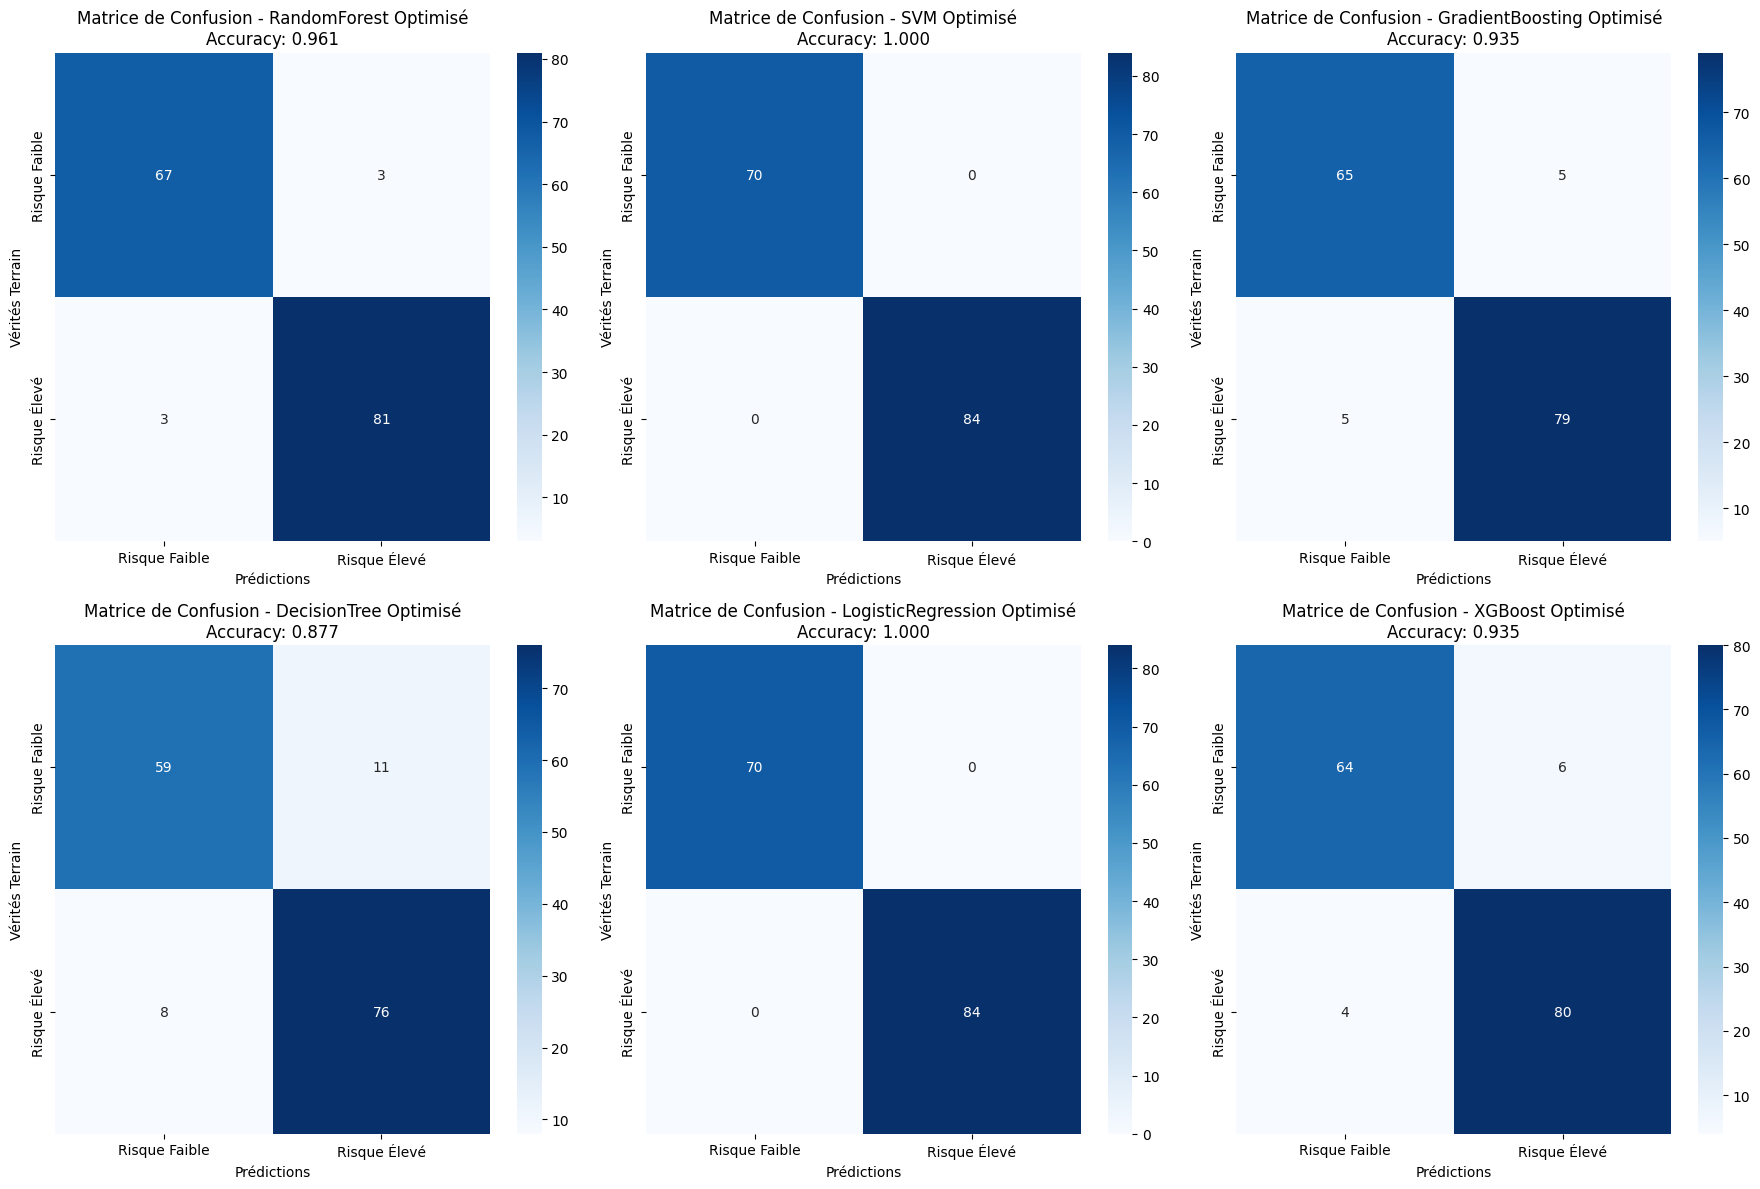

In [136]:
print("🚀 Optimisation des models : ")
modeles_optimises, meilleurs_params, resultats_scores_apres, resultats_modeles_apres, predictions_apres, matrices_apres = optimiser_hyperparametres(
    X_train, X_test, y_train, y_test, the_models, param_grid
)

In [137]:
# Les performances avant l'optimisation : 
pd.DataFrame(resultats_scores)

RandomForest       SVM  GradientBoosting  DecisionTree  \
accuracy       0.948052  0.980519          0.928571      0.922078   
precision      0.948234  0.981191          0.928729      0.922180   
recall         0.948052  0.980519          0.928571      0.922078   
f1_score       0.947981  0.980477          0.928611      0.921972   
cv_mean        0.939910  0.956130          0.926907      0.835956   
cv_std         0.010925  0.018287          0.011553      0.031313   

           LogisticRegression   XGBoost  
accuracy             0.993506  0.941558  
precision            0.993583  0.942030  
recall               0.993506  0.941558  
f1_score             0.993502  0.941431  
cv_mean              0.988629  0.931811  
cv_std               0.006512  0.016487

In [138]:
# Les performances apres l'optimisation : 
pd.DataFrame(resultats_scores_apres)

RandomForest       SVM  GradientBoosting  DecisionTree  \
accuracy           0.961039  1.000000          0.935065      0.876623   
precision          0.961039  1.000000          0.935065      0.876760   
recall             0.961039  1.000000          0.935065      0.876623   
f1_score           0.961039  1.000000          0.935065      0.876355   
cv_mean            0.923417  0.983740          0.926692      0.848401   
cv_std             0.018133  0.013604          0.019784      0.020109   
best_cv_score      0.946260  0.988590          0.949520      0.889181   

               LogisticRegression   XGBoost  
accuracy                 1.000000  0.935065  
precision                1.000000  0.935207  
recall                   1.000000  0.935065  
f1_score                 1.000000  0.934976  
cv_mean                  0.986985  0.938070  
cv_std                   0.014188  0.012151  
best_cv_score            0.983683  0.947816

In [139]:
pd.DataFrame(resultats_modeles_apres)

RandomForest  \
modele             (DecisionTreeClassifier(max_depth=5, max_featu...   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.6341558434759571, 0.4777415752675611, 0.028...   

                                                                 SVM  \
modele                  SVC(C=100, kernel='linear', random_state=42)   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba                                               None   

                                                    GradientBoosting  \
modele             ([DecisionTreeRegressor(criterion='friedman_ms...   
predictions        [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.27788985476561184, 0.6003442390484107, 5.47...   

                                                        DecisionTree  \
modele             DecisionTreeClassifier(criterion='entropy', ma...   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...   
predictions_proba  [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...   

                                                  LogisticRegression  \
modele             LogisticRegression(C=10, penalty='l1', random_...   
predictions        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...   
predictions_proba  [0.8934462774683779, 0.007164623254114988, 1.3...   

                                                             XGBoost  
modele             XGBClassifier(base_score=None, booster=None, c...  
predictions        [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...  
predictions_proba  [0.67936826, 0.55672807, 0.0001257136, 0.94942...

In [140]:
pd.DataFrame(meilleurs_params)

RandomForest     SVM  GradientBoosting DecisionTree  \
n_estimators                50     NaN             200.0          NaN   
min_samples_split           10     NaN               2.0            2   
min_samples_leaf             2     NaN               1.0            1   
max_features              sqrt     NaN               NaN         None   
max_depth                    5     NaN               4.0            7   
kernel                     NaN  linear               NaN          NaN   
degree                     NaN       3               NaN          NaN   
C                          NaN     100               NaN          NaN   
subsample                  NaN     NaN               0.8          NaN   
learning_rate              NaN     NaN               0.1          NaN   
criterion                  NaN     NaN               NaN      entropy   
penalty                    NaN     NaN               NaN          NaN   
solver                     NaN     NaN               NaN          NaN   
reg_lambda                 NaN     NaN               NaN          NaN   
reg_alpha                  NaN     NaN               NaN          NaN   
gamma                      NaN     NaN               NaN          NaN   
colsample_bytree           NaN     NaN               NaN          NaN   

                  LogisticRegression  XGBoost  
n_estimators                     NaN    200.0  
min_samples_split                NaN      NaN  
min_samples_leaf                 NaN      NaN  
max_features                     NaN      NaN  
max_depth                        NaN      4.0  
kernel                           NaN      NaN  
degree                           NaN      NaN  
C                                 10      NaN  
subsample                        NaN      0.9  
learning_rate                    NaN      0.1  
criterion                        NaN      NaN  
penalty                           l1      NaN  
solver                     liblinear      NaN  
reg_lambda                       NaN      2.0  
reg_alpha                        NaN      0.0  
gamma                            NaN      0.0  
colsample_bytree                 NaN      0.8

### 6️⃣ Comparer les performances des différents modèles.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: center;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>RandomForest</th>
      <th>SVM</th>
      <th>GradientBoosting</th>
      <th>DecisionTree</th>
      <th>LogisticRegression</th>
      <th>XGBoost</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>accuracy</th>
      <td>0.961039</td>
      <td>1.000000</td>
      <td>0.954545</td>
      <td>0.870130</td>
      <td>1.000000</td>
      <td>0.935065</td>
    </tr>
    <tr>
      <th>precision</th>
      <td>0.961261</td>
      <td>1.000000</td>
      <td>0.954569</td>
      <td>0.870072</td>
      <td>1.000000</td>
      <td>0.935207</td>
    </tr>
    <tr>
      <th>recall</th>
      <td>0.961039</td>
      <td>1.000000</td>
      <td>0.954545</td>
      <td>0.870130</td>
      <td>1.000000</td>
      <td>0.935065</td>
    </tr>
    <tr>
      <th>f1_score</th>
      <td>0.960986</td>
      <td>1.000000</td>
      <td>0.954516</td>
      <td>0.869953</td>
      <td>1.000000</td>
      <td>0.934976</td>
    </tr>
    <tr>
      <th>cv_mean</th>
      <td>0.926678</td>
      <td>0.990243</td>
      <td>0.934889</td>
      <td>0.828740</td>
      <td>0.986976</td>
      <td>0.939737</td>
    </tr>
    <tr>
      <th>cv_std</th>
      <td>0.016343</td>
      <td>0.007967</td>
      <td>0.016158</td>
      <td>0.022733</td>
      <td>0.009754</td>
      <td>0.020266</td>
    </tr>
    <tr>
      <th>best_cv_score</th>
      <td>0.941350</td>
      <td>0.988590</td>
      <td>0.946250</td>
      <td>0.882702</td>
      <td>0.982042</td>
      <td>0.941352</td>
    </tr>
    <tr>
      <th>Commentaire</th>
      <td>Très bon, stable</td>
      <td>Excellent, mais in prend le temps dans la prediction </td>
      <td>Bon</td>
      <td>Faible</td>
      <td>Excellent, simple, rapide</td>
      <td>Très bon</td>
    </tr>
  </tbody>
</table>
</div>

### 7️⃣ Choisir le modèle le plus performant.

#### ✅ Modèle final à retenir : Logistic Regression

Pourquoi : 

* Performances équivalentes au SVM (accuracy et F1-score = 1.00)

* Très bonne stabilité (faible cv_std)

* Modèle interprétable, léger, et rapide à charger

* Compatible sans souci avec .predict_proba() (utile pour afficher un score de risque)

* Facile à déployer dans l' application Streamlit

In [141]:
X_train_resampled[0]

array([-0.53569543, -1.25298647, -0.91668832, -1.14190148, -1.29986264,
       -1.0906341 , -0.49073479, -1.03594038])

In [142]:
X_test_scaled[5]

array([ 0.76180751, -0.62240141, -0.01374337,  0.36281076,  0.66116909,
        0.77467637, -0.4313122 ,  1.92210795])

#### ✅ Réentrîner le model Choisi : 

In [143]:

# Réentraînement du modèle Logistic Regression optimisé

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Hyperparamètres choisis
# ------------------------------------------------------------------------------------------------------------------------------------------------------
import pickle


param_grid = {
    'C': [10],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Modèle Logistic Regression
# ------------------------------------------------------------------------------------------------------------------------------------------------------
model = LogisticRegression(random_state=42)

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Recherche de grille 
# ------------------------------------------------------------------------------------------------------------------------------------------------------
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Entraînement
# ------------------------------------------------------------------------------------------------------------------------------------------------------
grid_search.fit(X_train_scaled, y_train)

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Évaluation
# ------------------------------------------------------------------------------------------------------------------------------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

print("✅ Meilleur modèle :", grid_search.best_estimator_)
print("\n📊 Rapport de classification :\n", classification_report(y_test, y_pred))
print("📉 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print(f"y_pred_proba {y_pred_proba}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# 💾 Sauvegarde du modèle et du scaler
# ------------------------------------------------------------------------------------------------------------------------------------------------------
with open("model_diabete.pkl", "wb") as file:
    pickle.dump(best_model, file)
    
with open("scaler.pkl", "wb") as f:
    pickle.dump(standar_scaler, f)


print("✅ Modèle sauvegardés avec succès !")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
✅ Meilleur modèle : LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

📊 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        84

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

📉 Matrice de confusion :
 [[70  0]
 [ 0 84]]
y_pred_proba [[2.33903702e-03 9.97660963e-01]
 [9.99997772e-01 2.22797150e-06]
 [1.00000000e+00 6.18215084e-18]
 [1.06691402e-03 9.98933086e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.39007689e-44]
 [1.77310309e-03 9.98226897e-01]
 [4.97488384e-08 9.99999950e-01]
 [0.00000000e+00 1.00000000e+00]
 [2.56718017e-06 9.99997433e-01]
 [0.00000000e+00 1.00000000e+00]
 [3.04011208e-04 9.99695989e-01]

In [144]:
test_data_normal = pd.DataFrame({
    "Pregnancies": [1],
    "Glucose": [90],
    "BloodPressure": [70],
    "SkinThickness": [20],
    "Insulin": [np.log1p(80)],
    "BMI": [22],
    "DiabetesPedigreeFunction": [np.log1p(0.3)],
    "Age": [25]
})

test_data_risque = pd.DataFrame({
    "Pregnancies": [5],
    "Glucose": [180],
    "BloodPressure": [90],
    "SkinThickness": [35],
    "Insulin": [np.log1p(400)],
    "BMI": [35],
    "DiabetesPedigreeFunction": [np.log1p(1.2)],
    "Age": [55]
})

# Testez les prédictions
print("Test données normales:", best_model.predict_proba(standar_scaler.transform(test_data_normal)))
print("Test données risque:", best_model.predict_proba(standar_scaler.transform(test_data_risque)))

Test données normales: [[1.00000000e+00 1.15125287e-27]]
Test données risque: [[0. 1.]]
